# House Price Regression (Kaggle)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

import numpy as np
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt

In [2]:
dattest = pd.read_csv("C:/Users/nanka/Python/House Price Regression/test.csv")
dattrain = pd.read_csv("C:/Users/nanka/Python/House Price Regression/train.csv")

test_id = dattest['Id']
#Target = dattrain['SalePrice']

In [3]:
dattrain['Train_Test'] = 'Train'
dattest['Train_Test'] = 'Test'
full_data = [dattrain,dattest]


dattrain['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
dattrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train_Test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train


In [5]:
dattest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Train_Test
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,Test
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,Test
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,Test
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,Test
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,Test


In [6]:
dattrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train_Test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train


In [7]:
null_list = dattrain.isnull().sum(axis=0) ## sum of all the nulls. Store them in a pandas series object
null_df = pd.DataFrame(null_list) ## Convert to data frame so we can easily filter
null_df[null_df[0] > 0] ## Show only the columns with nulls

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [8]:
dattrain.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train_Test
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000,1460
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,3,4,4,NaN,NaN,NaN,9,6,NaN,1
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN,Train
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,3,157,49,NaN,NaN,NaN,1267,1198,NaN,1460
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890,NaN
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,NaN
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000,NaN
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000,NaN
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000,NaN


## Exploratory Analysis

### Target Variable: Sale Price


Since this is a regression problem, its important to check the whether or not the data is normally distributed. In this case, since we are dealing with sales prices (that theoretically should not be below zero dollars), we will most likely observe a right skew.

Code Credit: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard


C:\Users\nanka\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


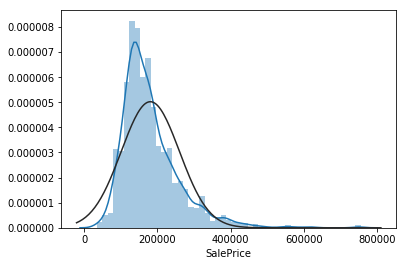

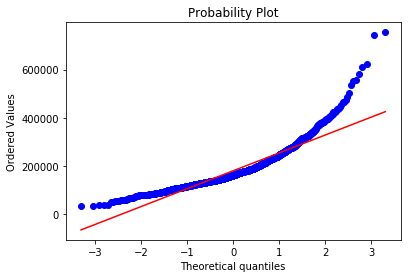

In [9]:
sns.distplot(dattrain['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['SalePrice'], plot=plt)

In [10]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
dattrain['SalePrice'] = np.log1p(dattrain['SalePrice'])
Target = dattrain['SalePrice']

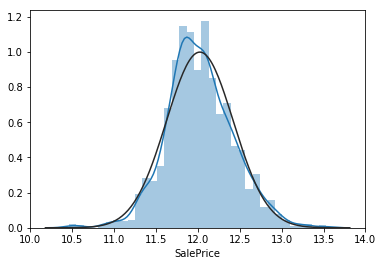

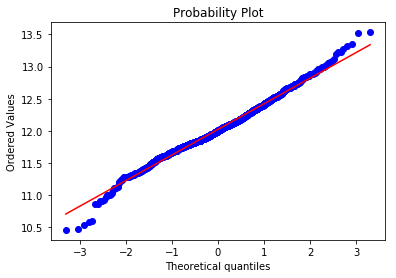

In [11]:
sns.distplot(dattrain['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['SalePrice'], plot=plt)

Looks like that took care of a making the sale price more normal. We will have to convert it back after we have predicted it.

## Total SF

Lets create a variable fot the total square foot in the house

In [12]:
dattrain['TotalSF'] = dattrain['TotalBsmtSF'] + dattrain['1stFlrSF'] + dattrain['2ndFlrSF']
dattest['TotalSF'] = dattest['TotalBsmtSF'] + dattest['1stFlrSF'] + dattest['2ndFlrSF']

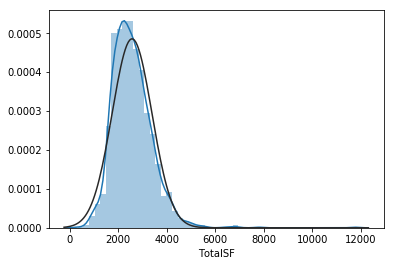

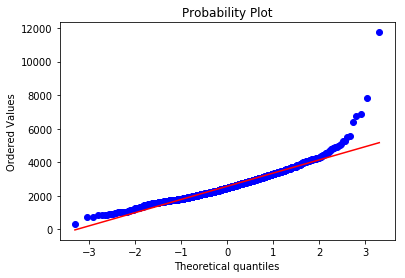

In [13]:
sns.distplot((dattrain['TotalSF']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['TotalSF']), plot=plt)

### TotalBsmtSF

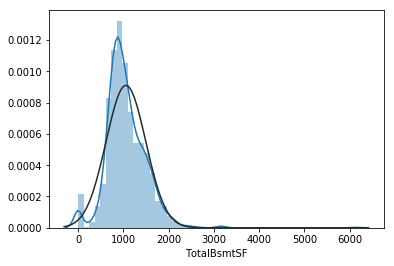

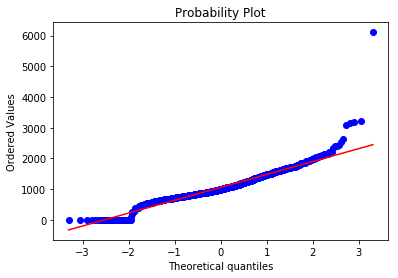

In [14]:
sns.distplot((dattrain['TotalBsmtSF']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['TotalBsmtSF']), plot=plt)

In [15]:
dattrain['TotalBsmtSF_Power'] = np.power(dattrain['TotalBsmtSF'],0.5)
dattest['TotalBsmtSF_Power'] = np.power(dattest['TotalBsmtSF'],0.5)

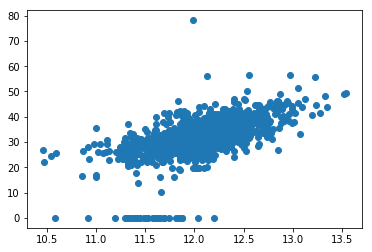

In [16]:
plt.scatter('SalePrice','TotalBsmtSF_Power', data = dattrain)

### 2ndFlrSF

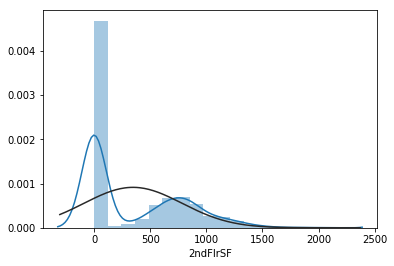

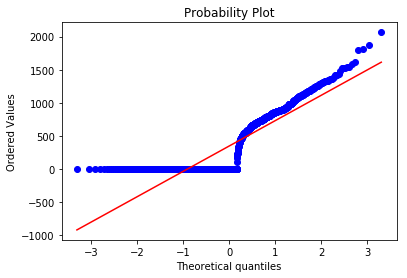

In [17]:
sns.distplot(dattrain['2ndFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['2ndFlrSF'], plot=plt)

This is interesting. Here we show what looks like two normal distributions. If people have a 2nd floor, t

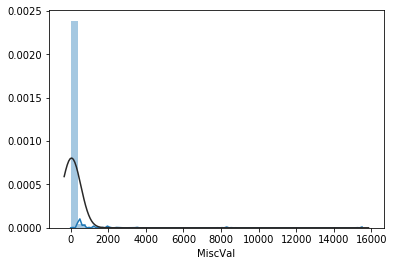

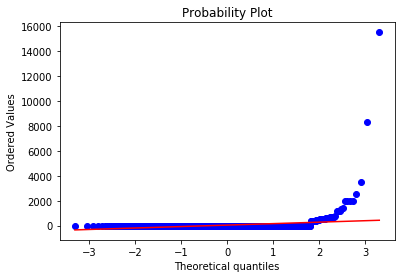

In [18]:
sns.distplot((dattrain['MiscVal']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['MiscVal']), plot=plt)

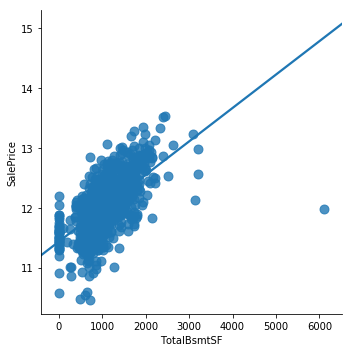

In [19]:
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=dattrain,
           order=1, ci=None, scatter_kws={"s": 80});

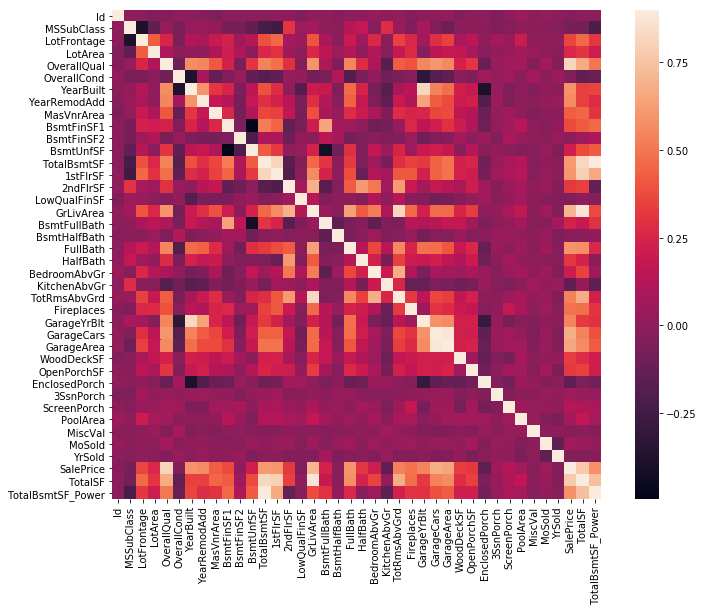

In [20]:
#Correlation map to see how features are correlated with SalePrice
corrmat = dattrain.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Categorical Variables


### MSSubClass:

This field has numeric dummy variables in it. As we review the data_description file corresponds to:


    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
    120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150  1-1/2 STORY PUD - ALL AGES
    160  2-STORY PUD - 1946 & NEWER
    180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190  2 FAMILY CONVERSION - ALL STYLES AND AGES



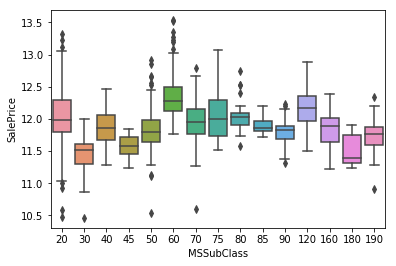

In [21]:
dattrain['MSSubClass']
sns.boxplot(x= 'MSSubClass', y = 'SalePrice', data = dattrain)

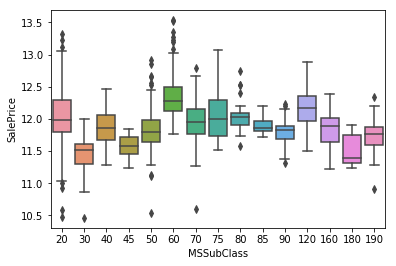

In [22]:
sns.boxplot(x = "MSSubClass", y = "SalePrice", data =dattrain)

Looks like this is a categorical variable that was made numeric. Let's transform the variable back to text and then one-hot encode it like the other categorical variables

In [23]:
## Convert the MSSubClass from numeric so we can more easily understand the labels as we do one-hot encoding later
mapping = { 20: "1-STORY 1946 & NEWER ALL STYLES" 
           , 30 : "1-STORY 1945 & OLDER"
           , 40 : "1-STORY W/FINISHED ATTIC ALL AGES"
           , 45 : "1-1/2 STORY - UNFINISHED ALL AGES"
           , 50 : "1-1/2 STORY FINISHED ALL AGES"
           , 60 : "2-STORY 1946 & NEWER"
           , 70 : "2-STORY 1945 & OLDER"
           , 80 : "SPLIT OR MULTI-LEVEL"
           , 85 : "SPLIT FOYER"
           , 90 : "DUPLEX - ALL STYLES AND AGES"
           , 120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER"
           , 150: "1-1/2 STORY PUD - ALL AGES"
           , 180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER"
           , 190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
          }
for dataset in full_data:
    dataset['MSSubClass'] = dataset['MSSubClass'].map(mapping)
    dataset['MSSubClass'] = dataset['MSSubClass'].fillna(0)
    


### MsZoning
MSZoning: Identifies the general zoning classification of the sale.

    A    Agriculture
    C    Commercial
    FV   Floating Village Residential
    I    Industrial
    RH   Residential High Density
    RL   Residential Low Density
    RP   Residential Low Density Park 
    RM   Residential Medium Density

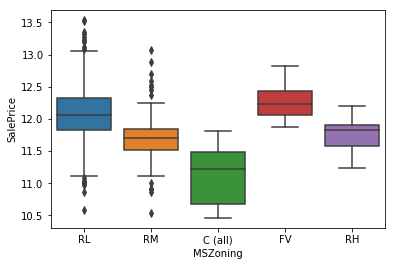

In [24]:
sns.boxplot(x = "MSZoning", y = "SalePrice", data =dattrain)

Looks like a categorical variable that we will address with One-Hot Encoding

### LotFrontage

LotFrontage: Linear feet of street connected to property



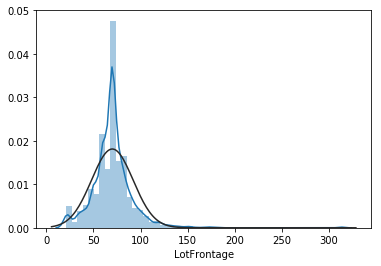

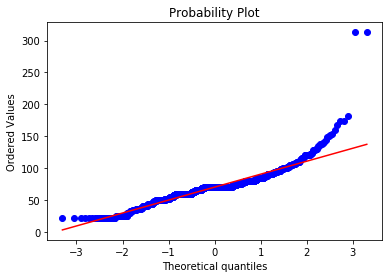

In [25]:
dattrain['LotFrontage'] = dattrain['LotFrontage'].fillna(dattrain['LotFrontage'].mean()) ## impute the nulls with the mean
sns.distplot((dattrain['LotFrontage']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['LotFrontage']), plot=plt)

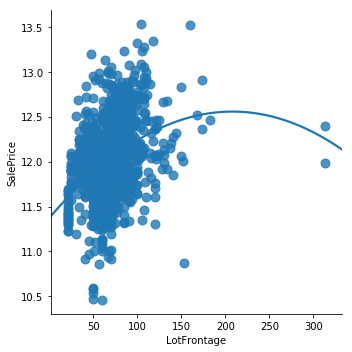

In [26]:
sns.lmplot(x='LotFrontage', y='SalePrice', data=dattrain,
           order=2, ci=None, scatter_kws={"s": 80});

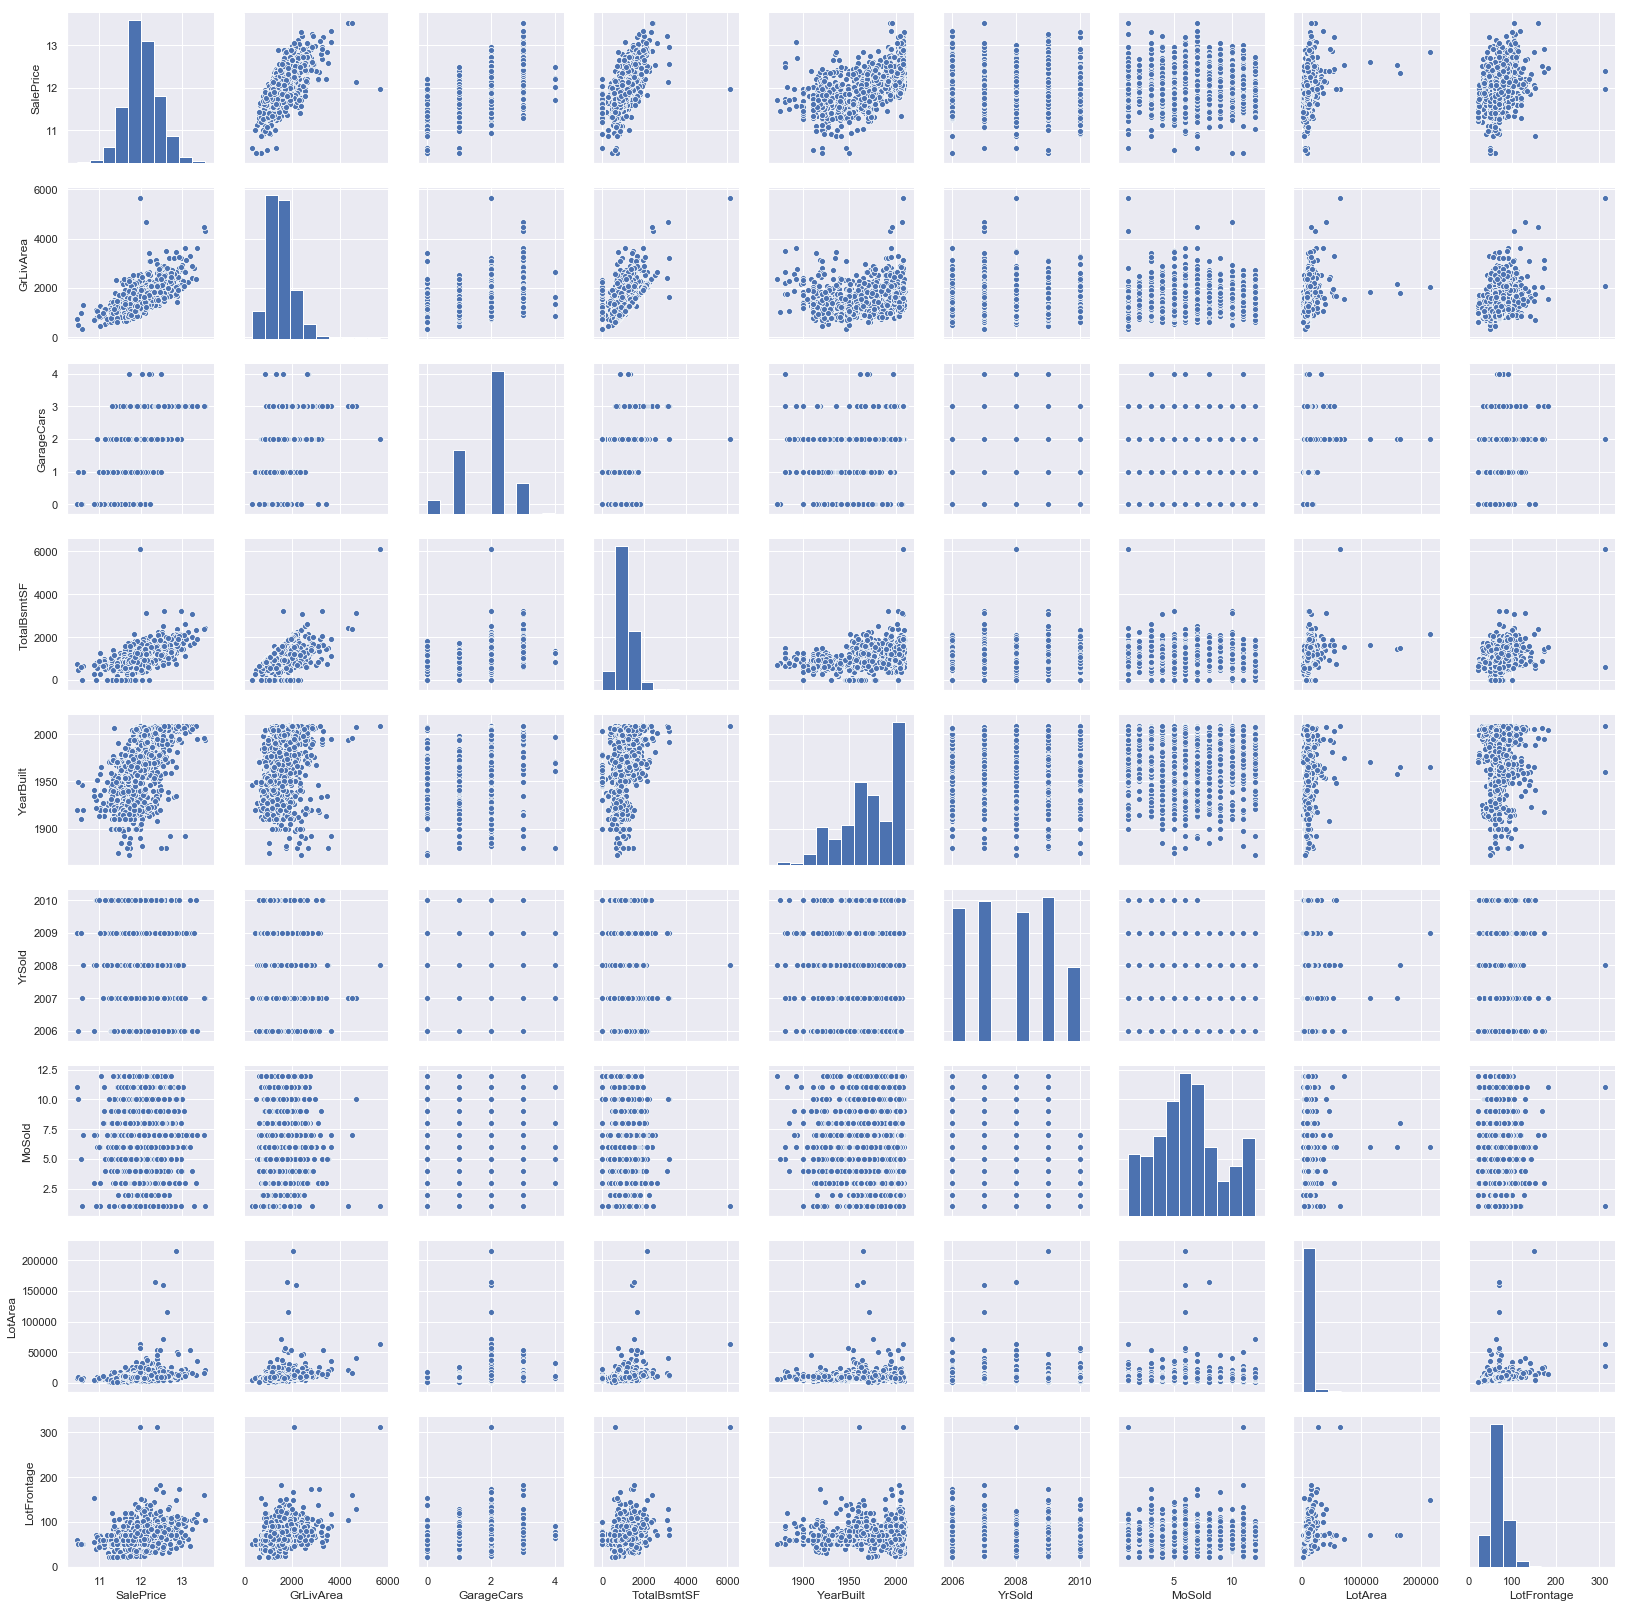

In [27]:
#scatterplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YrSold', 'MoSold', 'LotArea','LotFrontage']
sns.pairplot(dattrain[cols], height = 2.5)
plt.show();

### Street
Street: Type of road access to property

    Grvl Gravel  
    Pave Paved

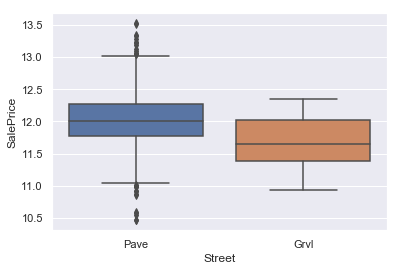

In [28]:
sns.boxplot(x = "Street", y = "SalePrice", data =dattrain)

In [29]:
mapping = { "Pave": 1, "Grvl": 0}
for dataset in full_data:
    dataset['Street'] = dataset['Street'].map(mapping)
    dataset['Street'] = dataset['Street'].fillna(0) ## Make any nulls gravl

### Alley 
Alley: Type of alley access to property

    Grvl Gravel
    Pave Paved
    NA   No alley access

Looks like the NA's here are representative of a class. We will handle that when we do feature engineering

In [30]:
dattrain['Alley'] = dattrain['Alley'].fillna('NoAlley')
dattest['Alley']  = dattest['Alley'].fillna('NoAlley')

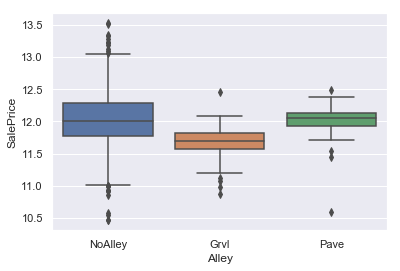

In [31]:
sns.boxplot(x = "Alley", y = "SalePrice", data =dattrain)

Since we have three classes of this categorical variable, we will one-hot encode them with the rest later

### LotShape
LotShape: General shape of property

    Reg  Regular 
    IR1  Slightly irregular
    IR2  Moderately Irregular
    IR3  Irregular

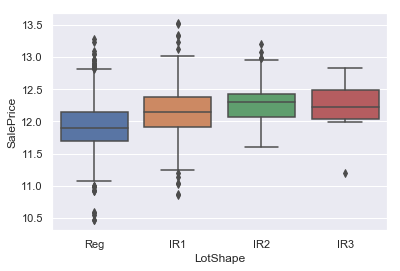

In [32]:
sns.boxplot(x = "LotShape", y = "SalePrice", data =dattrain)

Looks like order matters here. We will encode with regular being the lowest and IR3 being the highest

In [33]:
## Convert the Lotshape to numeric so models can handle them appropriately
lotshape_mapping = { "Reg": 1, "IR1": 2, "IR2":3, "IR3":4}
for dataset in full_data:
    dataset['LotShape'] = dataset['LotShape'].map(lotshape_mapping)
    dataset['LotShape'] = dataset['LotShape'].fillna(0)


### LandContour
LandContour: Flatness of the property

    Lvl  Near Flat/Level 
    Bnk  Banked - Quick and significant rise from street grade to building
    HLS  Hillside - Significant slope from side to side
    Low  Depression

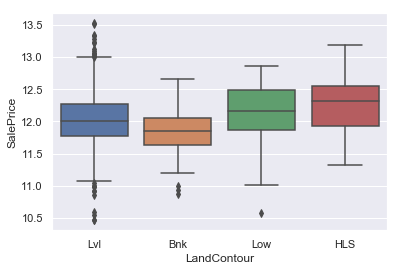

In [34]:
sns.boxplot(x = "LandContour", y = "SalePrice", data =dattrain)

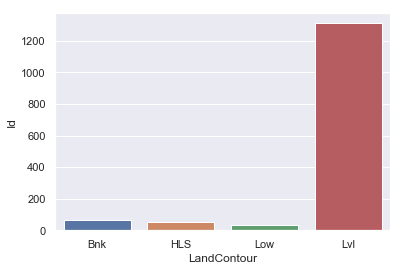

In [35]:
a = dattrain[['LandContour','Id']].groupby(['LandContour'], as_index = False).count()
sns.barplot(x = 'LandContour', y = 'Id', data = a)

Looks most of the lots are leveled. Given the limited variability in this items, lets drop it for now


In [36]:
##drop_elements = ['LandContour']


##dattrain = dattrain.drop(drop_elements, axis = 1)
##dattest = dattest.drop(drop_elements, axis = 1)

### Utilities

Utilities: Type of utilities available

    AllPub   All public Utilities (E,G,W,& S)    
    NoSewr   Electricity, Gas, and Water (Septic Tank)
    NoSeWa   Electricity and Gas Only
    ELO  Electricity only  
   
Looks like most of the utilities are all public.. Drop this variable

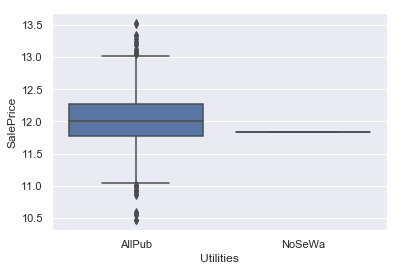

In [37]:
sns.boxplot(x = "Utilities", y = "SalePrice", data =dattrain)

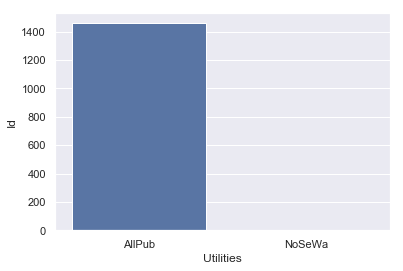

In [38]:
a = dattrain[['Utilities','Id']].groupby(['Utilities'], as_index = False).count()
sns.barplot(x = 'Utilities', y = 'Id', data = a)

Very few records that are not all public. Let's drop it

In [39]:
drop_elements = ['Utilities']


dattrain = dattrain.drop(drop_elements, axis = 1)
dattest = dattest.drop(drop_elements, axis = 1)

### LotConfig

LotConfig: Lot configuration

    Inside   Inside lot
    Corner   Corner lot
    CulDSac  Cul-de-sac
    FR2  Frontage on 2 sides of property
    FR3  Frontage on 3 sides of property

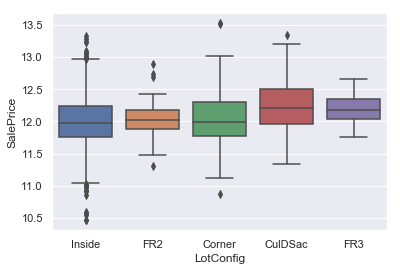

In [40]:
sns.boxplot(x = "LotConfig", y = "SalePrice", data =dattrain)

Looks like a categorical variable without any order. We will one-hot encode with the rest later.

### Landslope
LandSlope: Slope of property

    Gtl  Gentle slope
    Mod  Moderate Slope  
    Sev  Severe Slope

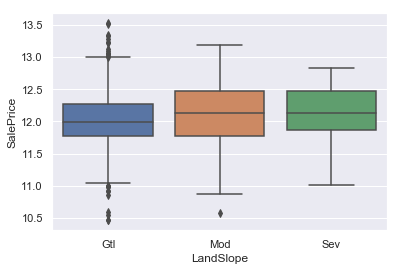

In [41]:
sns.boxplot(x = "LandSlope", y = "SalePrice", data =dattrain)

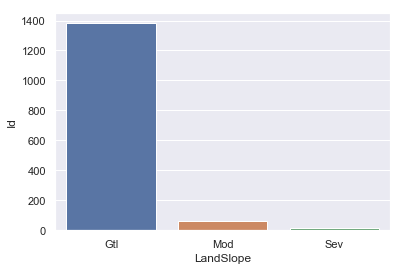

In [42]:
a = dattrain[['LandSlope','Id']].groupby(['LandSlope'], as_index = False).count()
sns.barplot(x = 'LandSlope', y = 'Id', data = a)

Looks like there is order here with gentle being the lowest and severe being the highest.


In [43]:
## Convert the Landslope to numeric so models can handle them appropriately
mapping = { "Gtl": 1, "Mod": 2, "Sev":3}
for dataset in full_data:
    dataset['LandSlope'] = dataset['LandSlope'].map(mapping)
    dataset['LandSlope'] = dataset['LandSlope'].fillna(1)

### Neighborhood
Neighborhood: Physical locations within Ames city limits

    Blmngtn  Bloomington Heights
    Blueste  Bluestem
    BrDale   Briardale
    BrkSide  Brookside
    ClearCr  Clear Creek
    CollgCr  College Creek
    Crawfor  Crawford
    Edwards  Edwards
    Gilbert  Gilbert
    IDOTRR   Iowa DOT and Rail Road
    MeadowV  Meadow Village
    Mitchel  Mitchell
    Names    North Ames
    NoRidge  Northridge
    NPkVill  Northpark Villa
    NridgHt  Northridge Heights
    NWAmes   Northwest Ames
    OldTown  Old Town
    SWISU    South & West of Iowa State University
    Sawyer   Sawyer
    SawyerW  Sawyer West
    Somerst  Somerset
    StoneBr  Stone Brook
    Timber   Timberland
    Veenker  Veenker

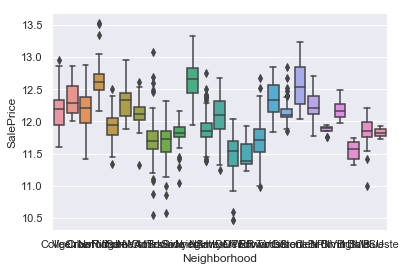

In [44]:
sns.boxplot(x = "Neighborhood", y = "SalePrice", data =dattrain)

Looks like neighborhood has an impact on house price. Let's create a feature for the mean, min, max of the sale price for each neighborhood. We will also keep the neighborhood variable and eventually one-hot encode it with the rest of the categorical variables.

In [45]:
##Group by Neighboorhood and calculate, mean, min and max of SalePrice
df1 = dattrain.groupby('Neighborhood')['SalePrice'].agg(['mean','max','min'])
df1.columns = ['Neighborhood_mean(SalePrice)', 'Neighborhood_max(SalePrice)','Neighborhood_min(SalePrice)']

## Merge with training dataset
dattrain = dattrain.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')


## Merge with testing dataset
dattest = dattest.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')


In [46]:
##Group by MSSubClass and calculate, mean, min and max of SalePrice
df1 = dattrain.groupby('MSSubClass')['SalePrice'].agg(['mean','max','min'])
df1.columns = ['MSSubClass_mean(SalePrice)', 'MSSubClass_max(SalePrice)','MSSubClass_min(SalePrice)']

## Merge with training dataset
dattrain = dattrain.merge(df1, left_on = 'MSSubClass', right_index = True, how = 'left')


## Merge with testing dataset
dattest = dattest.merge(df1, left_on = 'MSSubClass', right_index = True, how = 'left')

### Condition 1 and Condition 2

These fields are very similar. I haven't figured out how to combine them and maybe one-hot encode each of them so I will drop them for now.


Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [47]:
# drop_elements = ['Condition1', 'Condition2']


# dattrain = dattrain.drop(drop_elements, axis = 1)
# dattest = dattest.drop(drop_elements, axis = 1)

### BldgType


BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

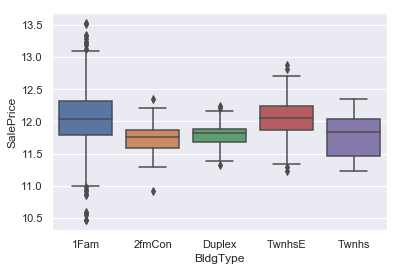

In [48]:
sns.boxplot(x = "BldgType", y = "SalePrice", data =dattrain)

Categorical.. Let's one-hot encode for now.

### RoofStyle
RoofStyle: Type of roof

    Flat Flat
    Gable    Gable
    Gambrel  Gabrel (Barn)
    Hip  Hip
    Mansard  Mansard
    Shed Shed

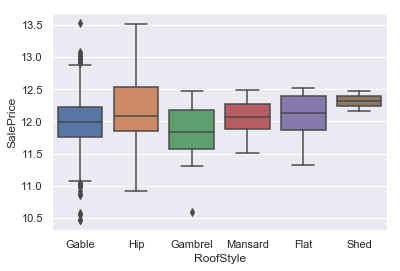

In [49]:
sns.boxplot(x = "RoofStyle", y = "SalePrice", data =dattrain)

Categorical.. Let's one-hot encode for now.

### SaleType

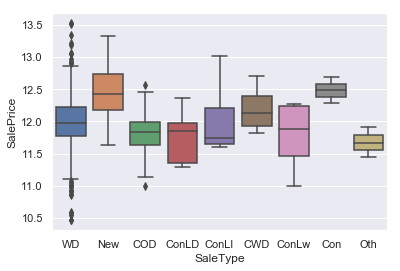

In [50]:
sns.boxplot(x = "SaleType", y = "SalePrice", data =dattrain)

Categorical.. Let's one-hot encode for now.

### SaleCondition

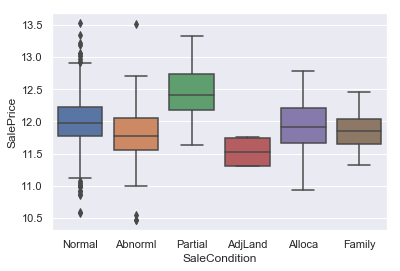

In [51]:
sns.boxplot(x = "SaleCondition", y = "SalePrice", data =dattrain)

Categorical... Let's one-hot encode for now

### HeatingQC

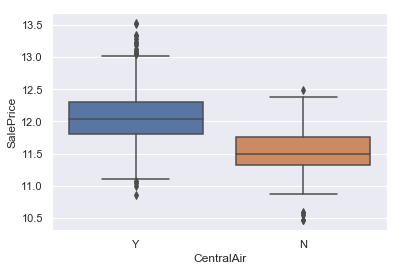

In [52]:
sns.boxplot(x = "CentralAir", y = "SalePrice", data =dattrain)

In [53]:
## Convert the Central Air to numeric so models can handle them appropriately
mapping = { "Y": 1, "N": 0}
for dataset in full_data:
    dataset['CentralAir'] = dataset['CentralAir'].map(mapping)
    dataset['CentralAir'] = dataset['CentralAir'].fillna(0)

### ExterCond


In [54]:
## Convert the ExterCond to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['ExterCond'] = dataset['ExterCond'].map(mapping)
    dataset['ExterCond'] = dataset['ExterCond'].fillna(0)
    
    


### ExterQual

In [55]:
## Convert the ExterQual to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['ExterQual'] = dataset['ExterQual'].map(mapping)
    dataset['ExterQual'] = dataset['ExterQual'].fillna(0)
    

### BsmtQual

In [56]:
## Convert the BsmtQual to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['BsmtQual'] = dataset['BsmtQual'].map(mapping)
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna(0)

### BsmtCond

In [57]:
## Convert the BsmtCond to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['BsmtCond'] = dataset['BsmtCond'].map(mapping)
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna(0)

### BsmtExposure

In [58]:
## Convert the BsmtExposure_ to numeric so models can handle them appropriately
mapping = {  "Gd": 4, "Av" :3 , "Mn" :2 , "No":1}
for dataset in full_data:
    dataset['BsmtExposure'] = dataset['BsmtExposure'].map(mapping)
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(0)

### HeatingQC

In [59]:
## Convert the HeatingQC to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['HeatingQC'] = dataset['HeatingQC'].map(mapping)
    dataset['HeatingQC'] = dataset['HeatingQC'].fillna(0)

### KitchenQual

In [60]:
## Convert the KitchenQual to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['KitchenQual'] = dataset['KitchenQual'].map(mapping)
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(0)

### FireplaceQu

In [61]:
## Convert the FireplaceQu to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map(mapping)
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(0)

### GarageQual

In [62]:
## Convert the GarageQual to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['GarageQual'] = dataset['GarageQual'].map(mapping)
    dataset['GarageQual'] = dataset['GarageQual'].fillna(0)

### GarageCond

In [63]:
## Convert the GarageCond to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['GarageCond'] = dataset['GarageCond'].map(mapping)
    dataset['GarageCond'] = dataset['GarageCond'].fillna(0)

### PoolQC

In [64]:
## Convert the PoolQC to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['PoolQC'] = dataset['PoolQC'].map(mapping)
    dataset['PoolQC'] = dataset['PoolQC'].fillna(0)

### Fence

In [65]:
## Convert the Fence to numeric so models can handle them appropriately
mapping = { "Ex": 5, "Gd": 4, "TA" :3 , "Fa" :2 , "Po":1}
for dataset in full_data:
    dataset['Fence'] = dataset['Fence'].map(mapping)
    dataset['Fence'] = dataset['Fence'].fillna(0)

### OverallQual

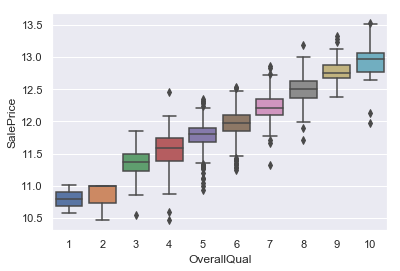

In [66]:
sns.boxplot(x = "OverallQual", y = "SalePrice", data =dattrain)

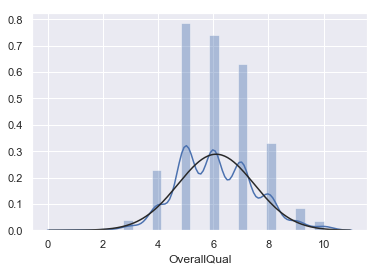

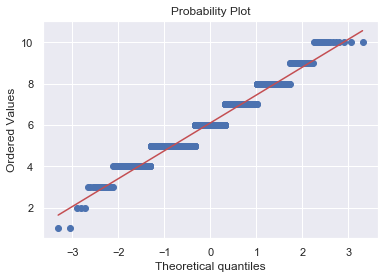

In [67]:
sns.distplot((dattrain['OverallQual']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['OverallQual']), plot=plt)

Looks like this numerical feature can stay the same. 

### OveralCond

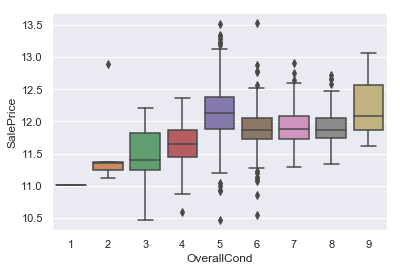

In [68]:
sns.boxplot(x = "OverallCond", y = "SalePrice", data =dattrain)

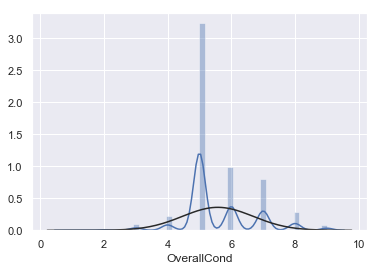

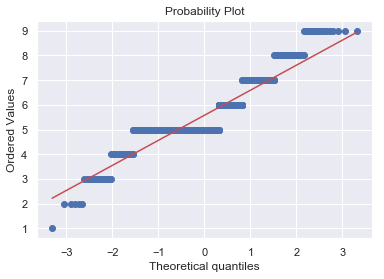

In [69]:
sns.distplot((dattrain['OverallCond']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['OverallCond']), plot=plt)

Let's keep this the way it is

### GarageFinish

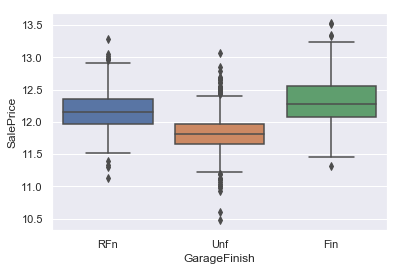

In [70]:
sns.boxplot(x = "GarageFinish", y = "SalePrice", data =dattrain)

Looks like the garage has three different levels of finished. Lets treat these as ordered

In [71]:
mapping = { "Fin": 3, "RFn": 2, "Unf":1}
for dataset in full_data:
    dataset['GarageFinish'] = dataset['GarageFinish'].map(mapping)
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna(0)

### GarageType

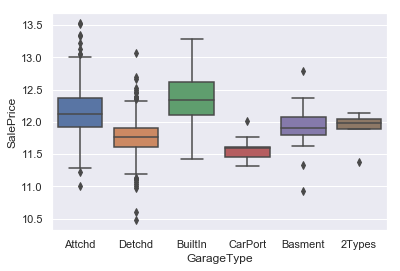

In [72]:
sns.boxplot(x = "GarageType", y = "SalePrice", data =dattrain)

Multiple different categories. Let's one-hot encode

### HouseStyle

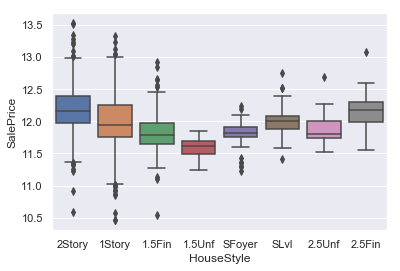

In [73]:
sns.boxplot(x = "HouseStyle", y = "SalePrice", data =dattrain)

Categorical.. One-hot encode

### RoofMatl

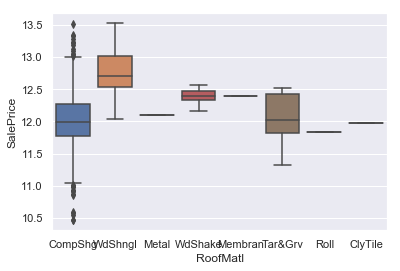

In [74]:
sns.boxplot(x = "RoofMatl", y = "SalePrice", data =dattrain)

Categorical.. One-hot

### BsmtFinType1

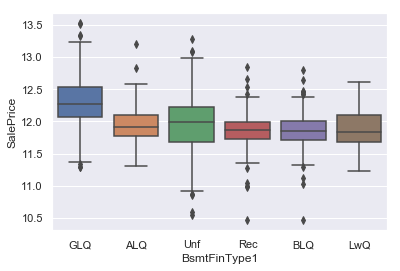

In [75]:
sns.boxplot(x = "BsmtFinType1", y = "SalePrice", data =dattrain)

Categorical.. one-hot

### BsmtFintype2

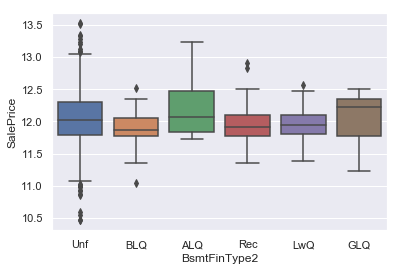

In [76]:
sns.boxplot(x = "BsmtFinType2", y = "SalePrice", data =dattrain)

Categorical.. one-hot

### BsmntFinSF1

In [77]:
for dataset in full_data:
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(0)

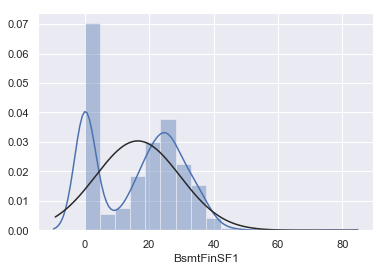

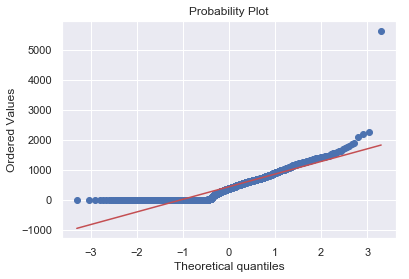

In [78]:
sns.distplot(np.power(dattrain['BsmtFinSF1'],0.5), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['BsmtFinSF1']), plot=plt)

In [79]:
dattrain['BsmtFinSF1_']= np.log1p(dattrain['BsmtFinSF1'])
dattest['BsmtFinSF1_log']= np.log1p(dattest['BsmtFinSF1'])

### BsmtFinType2

In [80]:
for dataset in full_data:
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(0)

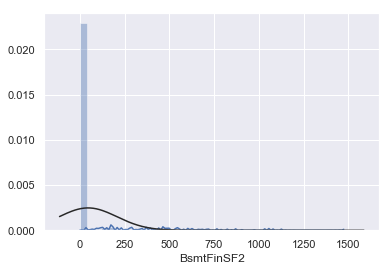

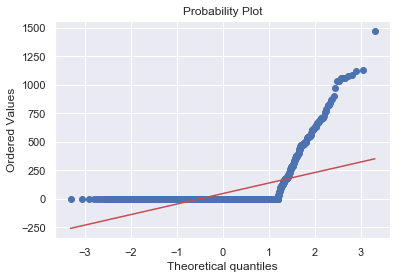

In [81]:
sns.distplot((dattrain['BsmtFinSF2']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['BsmtFinSF2']), plot=plt)

Remove NAs by making them zero. 

### BsmtUnfSF

In [82]:
for dataset in full_data:
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)

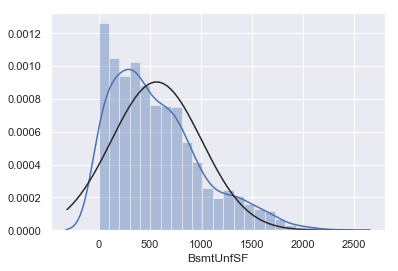

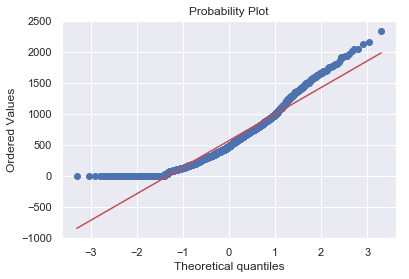

In [83]:
sns.distplot((dattrain['BsmtUnfSF']), fit=norm);
fig = plt.figure()
res = stats.probplot((dattrain['BsmtUnfSF']), plot=plt)

In [84]:
dattrain['BsmtUnfSFLog'] = np.log1p(dattrain['BsmtUnfSF'])
dattest['BsmtUnfSFLog'] = np.log1p(dattest['BsmtUnfSF'])

## Heating

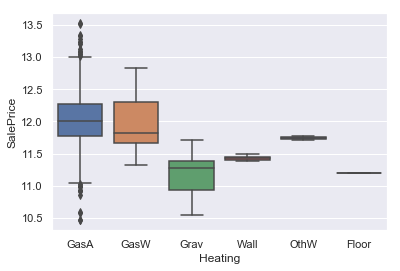

In [85]:
sns.boxplot(x = "Heating", y = "SalePrice", data =dattrain)

Categorical... Let's one-hot encode

### Electrical

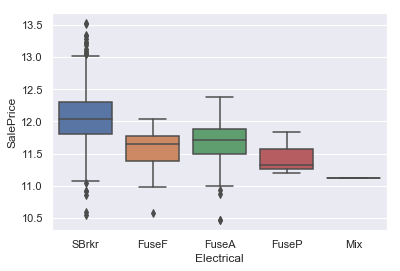

In [86]:
sns.boxplot(x = "Electrical", y = "SalePrice", data =dattrain)

Categorical... Let's one-hot encode

### Foundation

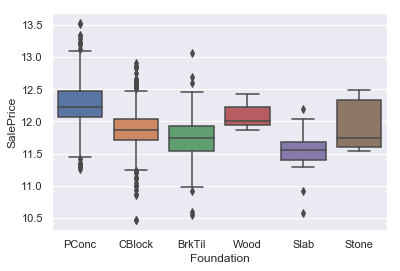

In [87]:
sns.boxplot(x = "Foundation", y = "SalePrice", data =dattrain)

Categorical... Let's one-hot encode

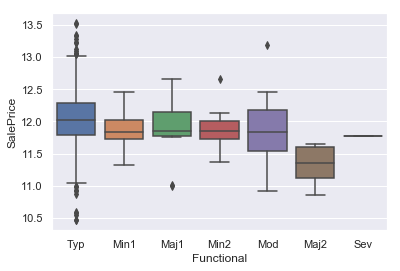

In [88]:
sns.boxplot(x = "Functional", y = "SalePrice", data =dattrain)

Looks like there should have been an order to this, but it doesn't seem to have a linear relationship with the target variable. Let's treat as categorical for now and one-hot

### MasVnrType

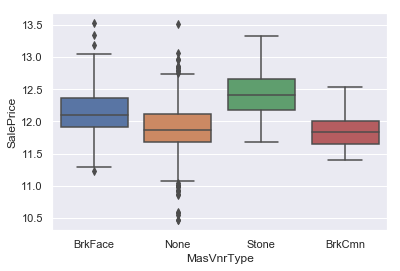

In [89]:
sns.boxplot(x = "MasVnrType", y = "SalePrice", data =dattrain)

Categorical.. one-hot

### MasVnrArea

In [90]:
### Remove nulls
for dataset in full_data:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [91]:
dattrain['MasVnrArea_Power'] = np.power(dattrain['MasVnrArea'],0.125)
dattest['MasVnrArea_Power'] = np.power(dattest['MasVnrArea'],0.125)


In [92]:
full_data = [dattrain,dattest]
full_data =pd.concat(full_data,ignore_index = True)

C:\Users\nanka\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### LotArea

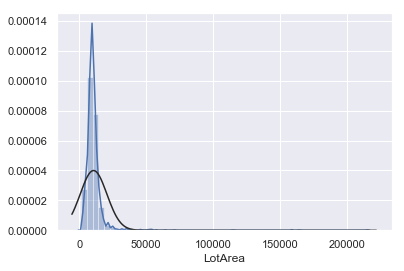

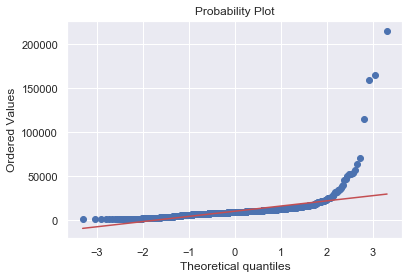

In [93]:
sns.distplot(dattrain['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['LotArea'], plot=plt)

Log Transform helps.. but introduces other issues that I am not really sure how to address at this point.


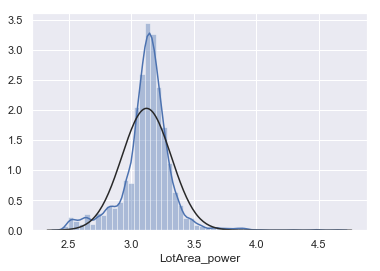

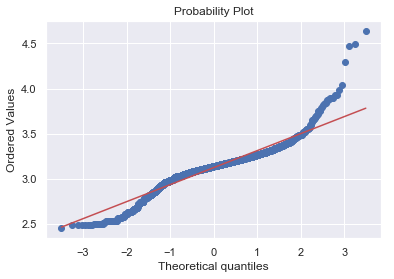

In [94]:
full_data['LotArea_power'] = np.power(full_data['LotArea'],0.125)
sns.distplot(full_data['LotArea_power'], fit=norm);
fig = plt.figure()
res = stats.probplot(full_data['LotArea_power'], plot=plt)

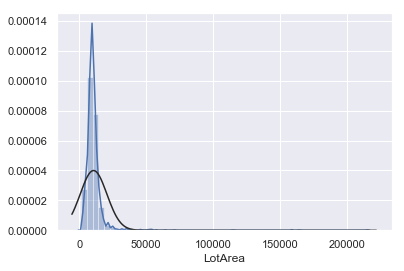

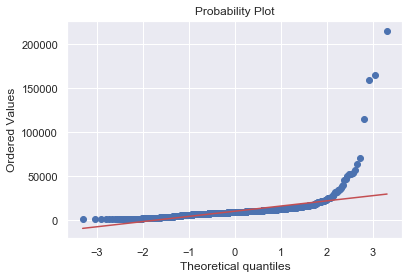

In [95]:
sns.distplot(dattrain['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['LotArea'], plot=plt)

### GrLivArea

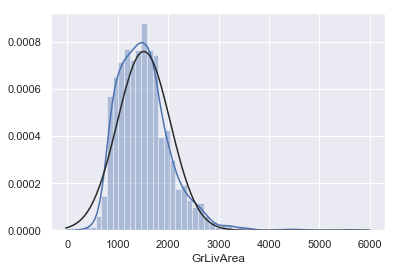

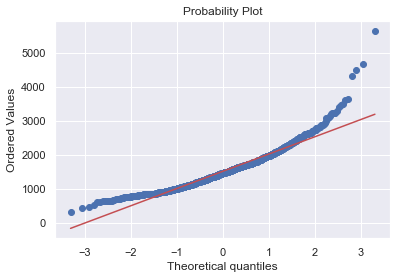

In [96]:
sns.distplot(dattrain['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['GrLivArea'], plot=plt)

Log Transform it :)

In [97]:
full_data['GrLivAreaLog'] = np.log(full_data['GrLivArea'])

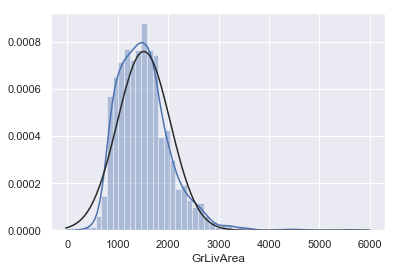

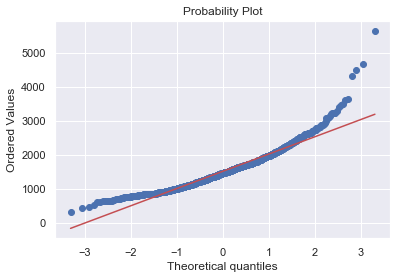

In [98]:
sns.distplot(dattrain['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['GrLivArea'], plot=plt)

## GarageArea

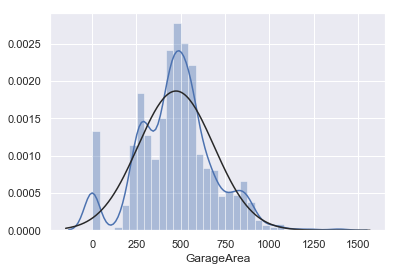

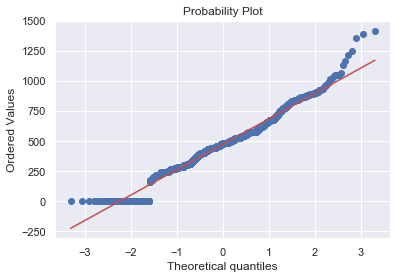

In [99]:
sns.distplot(dattrain['GarageArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['GarageArea'], plot=plt)

In [100]:
full_data['GarageArea_Log'] = np.log1p(full_data['GarageArea'])

### 1stFlrSF

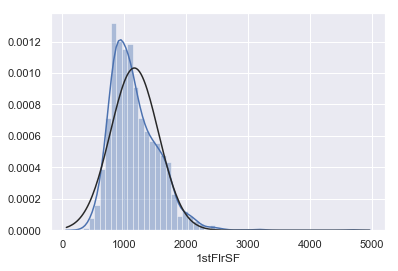

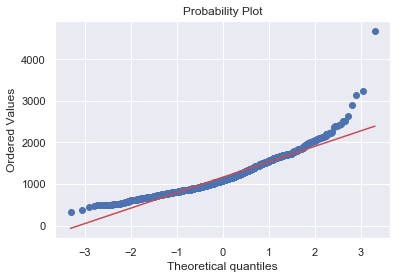

In [101]:
sns.distplot(dattrain['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(dattrain['1stFlrSF'], plot=plt)

In [102]:
full_data['1stFlrSFLog'] = np.log(full_data['1stFlrSF'])

In [103]:
##Group by Neighboorhood and calculate, mean, min and max of 1stFlrSF
df1 = full_data.groupby('Neighborhood')['1stFlrSF'].agg(['mean','max','min'])
df1.columns = ['Neighborhood_mean(1stFlrSF)', 'Neighborhood_max(1stFlrSF)','Neighborhood_min(1stFlrSF)']

## Merge with full dataset
full_data = full_data.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')

## Calculate the difference between each individual house and the mean, max and mean

full_data['Delta_From_Neighborhood_mean(1stFlrSF)'] = full_data['1stFlrSF'] - full_data['Neighborhood_mean(1stFlrSF)']
full_data['Delta_From_Neighborhood_max(1stFlrSF)'] = full_data['1stFlrSF'] - full_data['Neighborhood_max(1stFlrSF)']
full_data['Delta_From_Neighborhood_min(1stFlrSF)'] = full_data['1stFlrSF'] - full_data['Neighborhood_min(1stFlrSF)']


In [104]:
##Group by Neighboorhood and calculate, mean, min and max of LotArea
df1 = full_data.groupby('Neighborhood')['LotArea'].agg(['mean','max','min'])
df1.columns = ['Neighborhood_mean(LotArea)', 'Neighborhood_max(LotArea)','Neighborhood_min(LotArea)']

## Merge with full dataset
full_data = full_data.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')

## Calculate the difference between each individual house and the mean, max and mean
full_data['Delta_From_Neighborhood_mean(LotArea)'] = full_data['LotArea'] - full_data['Neighborhood_mean(LotArea)']
full_data['Delta_From_Neighborhood_max(LotArea)'] = full_data['LotArea'] - full_data['Neighborhood_max(LotArea)']
full_data['Delta_From_Neighborhood_min(LotArea)'] = full_data['LotArea'] - full_data['Neighborhood_min(LotArea)']


In [105]:
##Group by Neighboorhood and calculate, mean, min and max of GrLivArea
df1 = full_data.groupby('Neighborhood')['GrLivArea'].agg(['mean','max','min'])
df1.columns = ['Neighborhood_mean(GrLivArea)', 'Neighborhood_max(GrLivArea)','Neighborhood_min(GrLivArea)']

## Merge with full dataset
full_data = full_data.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')

## Callculate the difference between each individual house and the mean, max and mean
full_data['Delta_From_Neighborhood_mean(GrLivArea)'] = full_data['GrLivArea'] - full_data['Neighborhood_mean(GrLivArea)']
full_data['Delta_From_Neighborhood_max(GrLivArea)'] = full_data['GrLivArea'] - full_data['Neighborhood_max(GrLivArea)']
full_data['Delta_From_Neighborhood_min(GrLivArea)'] = full_data['GrLivArea'] - full_data['Neighborhood_min(GrLivArea)']


In [106]:
##Group by Neighboorhood and calculate, mean, min and max of GrLivArea
df1 = full_data.groupby('Neighborhood')['OverallCond'].agg(['mean','max','min'])
df1.columns = ['Neighborhood_mean(OverallCond)', 'Neighborhood_max(OverallCond)','Neighborhood_min(OverallCond)']

## Merge with full dataset
full_data = full_data.merge(df1, left_on = 'Neighborhood', right_index = True, how = 'left')

## Callculate the difference between each individual house and the mean, max and mean
full_data['Delta_From_Neighborhood_mean(OverallCond)'] = full_data['OverallCond'] - full_data['Neighborhood_mean(OverallCond)']
full_data['Delta_From_Neighborhood_max(OverallCond)'] = full_data['OverallCond'] - full_data['Neighborhood_max(OverallCond)']
full_data['Delta_From_Neighborhood_min(OverallCond)'] = full_data['OverallCond'] - full_data['Neighborhood_min(OverallCond)']


In [107]:
## Calculate the mean, min and max of OverallQual
Mean_OverallQual = full_data['OverallQual'].mean()
Max_OverallQual = full_data['OverallQual'].max()
Min_OverallQual = full_data['OverallQual'].min()

### Calculate the difference between each individual house and the mean, min and max
full_data['Delta_From_mean(OverallQual)'] = full_data['OverallQual'] - Mean_OverallQual
full_data['Delta_From_min(OverallQual)'] = full_data['OverallQual'] - Min_OverallQual
full_data['Delta_From_max(OverallQual)'] = full_data['OverallQual'] - Max_OverallQual


In [108]:
## Calculate the mean, min and max of OverallCond
Mean_OverallCond = full_data['OverallCond'].mean()
Max_OverallCond = full_data['OverallCond'].max()
Min_OverallCond = full_data['OverallCond'].min()

### Calculate the difference between each individual house and the mean, min and max
full_data['Delta_From_mean(OverallCond)'] = full_data['OverallCond'] - Mean_OverallCond
full_data['Delta_From_min(OverallCond)'] = full_data['OverallCond'] - Min_OverallCond
full_data['Delta_From_max(OverallCond)'] = full_data['OverallCond'] - Max_OverallCond


In [109]:
numeric_feats = full_data.dtypes[full_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = full_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
Delta_From_Neighborhood_mean(LotArea),13.463221
Delta_From_Neighborhood_min(LotArea),13.055443
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.145323
EnclosedPorch,4.003891


In [110]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #full_data[feat] += 1
    full_data[feat] = boxcox1p(full_data[feat], lam)
    
#full_data[skewed_features] = np.log1p(full_data[skewed_features])

There are 85 skewed numerical features to Box Cox transform


In [111]:
full_data = pd.get_dummies(full_data)

In [112]:
full_data['BsmtFinSF1'] = full_data['BsmtFinSF1'].fillna(0)
full_data['BsmtFinSF2'] = full_data['BsmtFinSF2'].fillna(0)
full_data['BsmtFullBath'] = full_data['BsmtFullBath'].fillna(0)
full_data['BsmtHalfBath'] = full_data['BsmtHalfBath'].fillna(0)
full_data['GarageArea'] = full_data['GarageArea'].fillna(0)
full_data['GarageCars'] = full_data['GarageCars'].fillna(0)
full_data['GarageYrBlt'] = full_data['GarageYrBlt'].fillna(0)
full_data['LotFrontage'] = full_data['LotFrontage'].fillna(0)
full_data['TotalBsmtSF'] = full_data['TotalBsmtSF'].fillna(0)


### Create Has Basement Variable

In [113]:
# for row in full_data['BsmtQual']:
#     if row == 0:
#         full_data['HasBsmt'] = 0
#     else:
#         full_data['HasBsmt'] = 1

### Create Has Garage Variable

In [114]:
full_data['GarageArea'] = full_data['GarageArea'].fillna(0)

for row in full_data['GarageArea']:
    if row == 0:
        full_data['HasGarage'] = 0
    else:
        full_data['HasGarage'] = 1

### Create Has 2nd Floor Variable

In [115]:
for row in full_data['2ndFlrSF']:
    if row == 0:
        full_data['Has2ndFlr'] = 0
    else:
        full_data['Has2ndFlr'] = 1

### Create Has Pool Variable

In [116]:
# for row in full_data['PoolQC']:
#     if row == 0:
#         full_data['HasPool'] = 0
#     else:
#         full_data['HasPool'] = 1

### Create Has MsnVnr Variable

In [117]:
for row in full_data['MasVnrArea']:
    if row == 0:
        full_data['HasMsnVnr'] = 0
    else:
        full_data['HasMsnVnr'] = 1

In [118]:
#dattrain = full_data.loc[full_data['Train_Test_Test'] == 1]
#dattest  = full_data.loc[full_data['Train_Test_Test'] == 0]

dattrain = full_data.loc[0:1459,:]
dattest = full_data.loc[1460:,:]

#Target = dattrain['SalePrice'].copy
drop_elements = ['Train_Test_Train','SalePrice','Id']

dattrain = dattrain.drop(drop_elements, axis = 1)
dattest = dattest.drop(drop_elements, axis = 1)

In [119]:
dattrain.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF1_,BsmtFinSF1_log,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Train_Test_Test,HasGarage,Has2ndFlr,HasMsnVnr
0,11.692623,11.686189,0.0,1.540963,11.170327,2.363503,NaN,0.0,0.730463,0.000000,...,0,0,0,0,0,1,0,1,1,1
1,12.792276,0.000000,0.0,1.540963,12.062832,2.420775,NaN,0.0,0.000000,0.730463,...,0,0,0,0,0,1,0,1,1,1
2,11.892039,11.724598,0.0,1.540963,10.200343,2.295280,NaN,0.0,0.730463,0.000000,...,0,0,0,0,0,1,0,1,1,1
3,12.013683,11.354094,0.0,1.540963,8.274266,2.136335,NaN,0.0,0.730463,0.000000,...,0,0,0,0,0,1,0,1,1,1
4,12.510588,12.271365,0.0,1.820334,10.971129,2.350033,NaN,0.0,0.730463,0.000000,...,0,0,0,0,0,1,0,1,1,1


### Modeling

In [121]:
#drop_elements = ['TotalSF']
#drop_elements = ['1stFlrSF', 'LotArea','GrLivArea', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFinSF1', 'TotalSF']
#['LotArea','GrLivArea','BsmtUnfSF', 'BsmtFinSF1', 'GamrageArea','TotalBsmtSF','MasVnrArea']
#drop_elements = ['GarageArea'] 
#drop_elements = []
##drop_elements = ['GarageArea','TotalBsmtSF']
#dattrain = dattrain.drop(drop_elements, axis = 1)
#dattest = dattest.drop(drop_elements, axis = 1)

In [122]:
X_train = dattrain
Y_train = Target
X_test = dattest
# Cross validate model with Kfold stratified cross val
kfold = KFold(n_splits=12, shuffle =True, random_state =42)

## Split Data into Train Test
X_train, X_test, Y_train, Y_test = train_test_split(dattrain,Target, test_size=0.2, random_state =1235)


In [123]:
X_csr = csr_matrix(X_train)
X_csr_test =csr_matrix(X_test)

dattest_csr = csr_matrix(dattest)
dattrain_csr = csr_matrix(dattrain)

### Early XGBoost Model

In [124]:
# fit model no training data, 
model = xgb.XGBRegressor(n_estimators=10000, learning_rate=0.05, max_depth = 3, subsample = 0.3)
eval_set = [(X_test, Y_test)]
model.fit(X_train, Y_train, eval_metric="rmse", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
## make prediction for train data
y_pred = model.predict(X_train)
predictions = y_pred
# evaluate predictions
rmse_train = mean_squared_error(Y_train, predictions)**(0.5)
print("Train RMSE: %.2f%%" % (rmse_train))

# make predictions for test data
y_pred = model.predict(X_test)
predictions = y_pred
# evaluate predictions
rmse_test = mean_squared_error(Y_test, predictions)**(0.5)
print("Test RMSE: %.2f%%" % (rmse_test))

[0]	validation_0-rmse:10.9679
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:10.4214
[2]	validation_0-rmse:9.90265
[3]	validation_0-rmse:9.40858
[4]	validation_0-rmse:8.94029
[5]	validation_0-rmse:8.49724
[6]	validation_0-rmse:8.07649
[7]	validation_0-rmse:7.67539
[8]	validation_0-rmse:7.29517
[9]	validation_0-rmse:6.93138
[10]	validation_0-rmse:6.58842
[11]	validation_0-rmse:6.26025
[12]	validation_0-rmse:5.94877
[13]	validation_0-rmse:5.65508
[14]	validation_0-rmse:5.37552
[15]	validation_0-rmse:5.10954
[16]	validation_0-rmse:4.8571
[17]	validation_0-rmse:4.61585
[18]	validation_0-rmse:4.38769
[19]	validation_0-rmse:4.16999
[20]	validation_0-rmse:3.96344
[21]	validation_0-rmse:3.76785
[22]	validation_0-rmse:3.58112
[23]	validation_0-rmse:3.40413
[24]	validation_0-rmse:3.23603
[25]	validation_0-rmse:3.07645
[26]	validation_0-rmse:2.9246
[27]	validation_0-rmse:2.7798
[28]	validation_0-rmse:2.64235
[29]	validation_0-rmse:2.51174
[30]	validation_0-

[252]	validation_0-rmse:0.121672
[253]	validation_0-rmse:0.121739
[254]	validation_0-rmse:0.121667
[255]	validation_0-rmse:0.121714
[256]	validation_0-rmse:0.12163
[257]	validation_0-rmse:0.121651
[258]	validation_0-rmse:0.121491
[259]	validation_0-rmse:0.121494
[260]	validation_0-rmse:0.121679
[261]	validation_0-rmse:0.121715
Stopping. Best iteration:
[211]	validation_0-rmse:0.120902

Train RMSE: 0.09%
Test RMSE: 0.12%


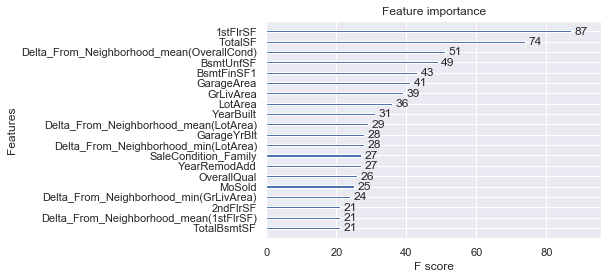

In [125]:
xgb.plot_importance(model, max_num_features =20)

In [126]:
#model.fit(dattrain,Target, eval_metric="rmse", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
log_Y_Pred = model.predict(dattest)
Y_pred = np.expm1(log_Y_Pred)

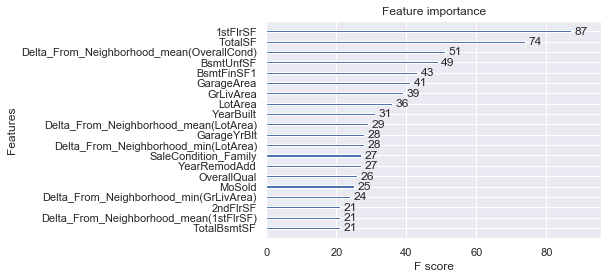

In [127]:
xgb.plot_importance(model, max_num_features =20)

In [128]:
# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_March14.csv', index=False)

In [129]:
model_xgb = xgb.XGBRegressor(colsample_bytree= 0.4, eval_metric = 'rmse', gamma = 0.04, 
 learning_rate = 0.01, max_depth = 6, min_child_weight = 1.7, 
 n_estimators = 2500, nthread = 4, seed = 1245, subsample = 0.3)

model_xgb.fit(X_train, Y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds=50)


## make prediction for train data
y_pred = model_xgb.predict(X_train)
predictions = y_pred
# evaluate predictions
rmse_train = mean_squared_error(Y_train, predictions)**(0.5)
print("Train RMSE: %.2f%%" % (rmse_train))

# make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = y_pred
# evaluate predictions
rmse_test = mean_squared_error(Y_test, predictions)**(0.5)
print("Test RMSE: %.2f%%" % (rmse_test))

[0]	validation_0-rmse:11.4281
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:11.3147
[2]	validation_0-rmse:11.2023
[3]	validation_0-rmse:11.0909
[4]	validation_0-rmse:10.98
[5]	validation_0-rmse:10.8708
[6]	validation_0-rmse:10.7627
[7]	validation_0-rmse:10.6557
[8]	validation_0-rmse:10.5499
[9]	validation_0-rmse:10.4451
[10]	validation_0-rmse:10.3414
[11]	validation_0-rmse:10.2387
[12]	validation_0-rmse:10.1367
[13]	validation_0-rmse:10.036
[14]	validation_0-rmse:9.93622
[15]	validation_0-rmse:9.83757
[16]	validation_0-rmse:9.73974
[17]	validation_0-rmse:9.64255
[18]	validation_0-rmse:9.54654
[19]	validation_0-rmse:9.45188
[20]	validation_0-rmse:9.35818
[21]	validation_0-rmse:9.2653
[22]	validation_0-rmse:9.17333
[23]	validation_0-rmse:9.08177
[24]	validation_0-rmse:8.99147
[25]	validation_0-rmse:8.90215
[26]	validation_0-rmse:8.81388
[27]	validation_0-rmse:8.72648
[28]	validation_0-rmse:8.64015
[29]	validation_0-rmse:8.5542
[30]	validation_0-rm

[259]	validation_0-rmse:0.883756
[260]	validation_0-rmse:0.875305
[261]	validation_0-rmse:0.86681
[262]	validation_0-rmse:0.858908
[263]	validation_0-rmse:0.850614
[264]	validation_0-rmse:0.842542
[265]	validation_0-rmse:0.83448
[266]	validation_0-rmse:0.826539
[267]	validation_0-rmse:0.818681
[268]	validation_0-rmse:0.810942
[269]	validation_0-rmse:0.803163
[270]	validation_0-rmse:0.795745
[271]	validation_0-rmse:0.78815
[272]	validation_0-rmse:0.780586
[273]	validation_0-rmse:0.773259
[274]	validation_0-rmse:0.765952
[275]	validation_0-rmse:0.758605
[276]	validation_0-rmse:0.751475
[277]	validation_0-rmse:0.744295
[278]	validation_0-rmse:0.737376
[279]	validation_0-rmse:0.730329
[280]	validation_0-rmse:0.72353
[281]	validation_0-rmse:0.716615
[282]	validation_0-rmse:0.709704
[283]	validation_0-rmse:0.702843
[284]	validation_0-rmse:0.696149
[285]	validation_0-rmse:0.689687
[286]	validation_0-rmse:0.683228
[287]	validation_0-rmse:0.676755
[288]	validation_0-rmse:0.670302
[289]	validati

[509]	validation_0-rmse:0.144472
[510]	validation_0-rmse:0.144044
[511]	validation_0-rmse:0.143603
[512]	validation_0-rmse:0.143223
[513]	validation_0-rmse:0.142839
[514]	validation_0-rmse:0.142515
[515]	validation_0-rmse:0.142111
[516]	validation_0-rmse:0.141741
[517]	validation_0-rmse:0.141366
[518]	validation_0-rmse:0.14103
[519]	validation_0-rmse:0.140707
[520]	validation_0-rmse:0.140282
[521]	validation_0-rmse:0.139903
[522]	validation_0-rmse:0.139573
[523]	validation_0-rmse:0.139245
[524]	validation_0-rmse:0.13895
[525]	validation_0-rmse:0.138699
[526]	validation_0-rmse:0.138423
[527]	validation_0-rmse:0.137976
[528]	validation_0-rmse:0.137709
[529]	validation_0-rmse:0.13738
[530]	validation_0-rmse:0.137098
[531]	validation_0-rmse:0.136819
[532]	validation_0-rmse:0.136493
[533]	validation_0-rmse:0.136104
[534]	validation_0-rmse:0.135808
[535]	validation_0-rmse:0.135484
[536]	validation_0-rmse:0.135224
[537]	validation_0-rmse:0.134955
[538]	validation_0-rmse:0.134685
[539]	validat

[759]	validation_0-rmse:0.121113
[760]	validation_0-rmse:0.121025
[761]	validation_0-rmse:0.121016
[762]	validation_0-rmse:0.121007
[763]	validation_0-rmse:0.120924
[764]	validation_0-rmse:0.12092
[765]	validation_0-rmse:0.12094
[766]	validation_0-rmse:0.120912
[767]	validation_0-rmse:0.120945
[768]	validation_0-rmse:0.120978
[769]	validation_0-rmse:0.120984
[770]	validation_0-rmse:0.120984
[771]	validation_0-rmse:0.120993
[772]	validation_0-rmse:0.120911
[773]	validation_0-rmse:0.120916
[774]	validation_0-rmse:0.120943
[775]	validation_0-rmse:0.120928
[776]	validation_0-rmse:0.121001
[777]	validation_0-rmse:0.121024
[778]	validation_0-rmse:0.120991
[779]	validation_0-rmse:0.121031
[780]	validation_0-rmse:0.121022
[781]	validation_0-rmse:0.121045
[782]	validation_0-rmse:0.121059
[783]	validation_0-rmse:0.121053
[784]	validation_0-rmse:0.121099
[785]	validation_0-rmse:0.12114
[786]	validation_0-rmse:0.121142
[787]	validation_0-rmse:0.121131
[788]	validation_0-rmse:0.121191
[789]	validat

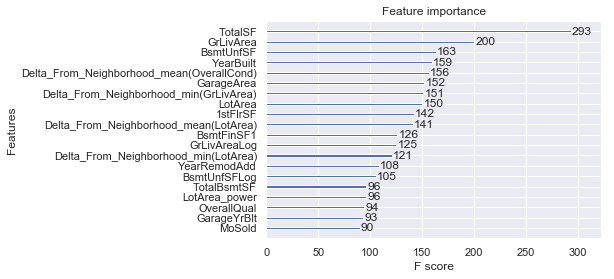

In [130]:
xgb.plot_importance(model_xgb, max_num_features =20)

In [132]:
xgtrain = xgb.DMatrix(dattrain, label = Target)

# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.04,
#                             learning_rate=0.01, max_depth=6,
#                             min_child_weight=1.7, n_estimators=2200)



xgb_param = model_xgb.get_xgb_params()
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = 5000, nfold = 10, metrics = ['rmse'], early_stopping_rounds = 50, stratified = False, seed =1256)

print('Best number of trees = {}'.format(cvresult.shape[0]))
model_xgb.set_params(n_estimators= cvresult.shape[0])

model_xgb.fit(dattrain, Target, eval_metric = 'rmse')




Best number of trees = 2139


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, eval_metric='rmse', gamma=0.04,
       learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=1.7, missing=None, n_estimators=2139, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1245, silent=True,
       subsample=0.3)

In [133]:
cvresult

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.416034,0.002008,11.416019,0.018213
1,11.302212,0.002031,11.302197,0.018202
2,11.189541,0.002119,11.189527,0.018119
3,11.078066,0.002033,11.078050,0.018207
4,10.967697,0.001980,10.967682,0.018271
5,10.858449,0.001966,10.858434,0.018292
6,10.750290,0.001903,10.750275,0.018362
7,10.643268,0.001902,10.643253,0.018374
8,10.537216,0.001841,10.537201,0.018456
9,10.432283,0.001826,10.432267,0.018493


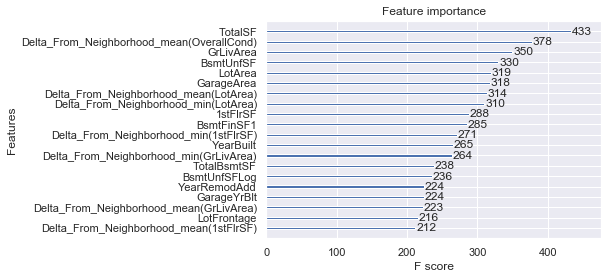

In [134]:
xgb.plot_importance(model_xgb, max_num_features =20)

In [135]:
# #model.fit(dattrain,Target, eval_metric="rmse", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
# log_Y_Pred = model_xgb.predict(dattest)
# Y_pred = np.expm1(log_Y_Pred)

# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_March14_cv.csv', index=False)

In [ ]:
xgb_model = xgb.XGBRegressor()

fit_parameters={"early_stopping_rounds":50, 
            "eval_metric" : "rmse", 
            "eval_set" : [[X_csr_test, Y_test]]}



## Search grid for optimal parameters
xgb_param_grid = {"learning_rate": [0.005,0.0],
              "n_estimators": [2500],
              "max_depth": [5,6,9],
              "subsample": [0.3,0.8,0.1],
              "colsample_bytree": [0.4,0.8],
              "nthread": [4],
              "eval_metric": ["rmse"],
              "gamma": [0.04,0.2],
              "min_child_weight": [1,1.7,3],
              "reg_alpha": [0,1],
                "reg_lambda": [0,1],
                "seed": [1245]}
## Previous bests
# {'colsample_bytree': 0.4, 'eval_metric': 'rmse', 'gamma': 0.04, 
#  'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1.7, 
#  'n_estimators': 2500, 'nthread': 4, 'seed': 1245, 'subsample': 0.3}

gsxgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid,
                     #fit_params = fit_parameters, 
                     cv=kfold, n_jobs= 4, verbose = 20 )
gsxgb.fit(dattrain_csr,Target)


## make prediction for train data
y_pred = gsxgb.predict(dattrain_csr)
predictions = y_pred
# evaluate predictions
rmse_train = mean_squared_error(Y_train, predictions)**(0.5)
print("Train RMSE: %.2f%%" % (rmse_train))



# make predictions for test data
# y_pred = gsxgb.predict(X_csr_test)
# predictions = y_pred
# # evaluate predictions
# rmse_test = mean_squared_error(Y_test, predictions)**(0.5)
# print("Test RMSE: %.2f%%" % (rmse_test))


Fitting 12 folds for each of 864 candidates, totalling 10368 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   44.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  2.9min
[Parallel(

[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed: 21.5min
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed: 21.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 22.0min
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed: 22.0min
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed: 22.0min
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed: 22.0min
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed: 23.1min
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed: 23.1min
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed: 23.1min
[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed: 23.1min
[Parallel(n_jobs=4)]: Done 149 tasks      | elapsed: 23.8min
[Parallel(n_jobs=4)]: Done 150 tasks      | elapsed: 23.8min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed: 42.4min
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed: 42.4min
[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed: 43.2min
[Parallel(n_jobs=4)]: Done 274 tasks      | elapsed: 43.2min
[Parallel(n_jobs=4)]: Done 275 tasks      | elapsed: 43.2min
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed: 43.2min
[Parallel(n_jobs=4)]: Done 277 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done 279 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done 281 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 282 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 283 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 284 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 285 tasks      | elapsed: 44.5min
[Parallel(n_jobs=4)]: Done 286 tasks      | elapsed: 44.5min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 407 tasks      | elapsed: 62.9min
[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed: 62.9min
[Parallel(n_jobs=4)]: Done 409 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 410 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 411 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 412 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed: 64.3min
[Parallel(n_jobs=4)]: Done 414 tasks      | elapsed: 64.3min
[Parallel(n_jobs=4)]: Done 415 tasks      | elapsed: 64.3min
[Parallel(n_jobs=4)]: Done 416 tasks      | elapsed: 64.3min
[Parallel(n_jobs=4)]: Done 417 tasks      | elapsed: 65.0min
[Parallel(n_jobs=4)]: Done 418 tasks      | elapsed: 65.0min
[Parallel(n_jobs=4)]: Done 419 tasks      | elapsed: 65.1min
[Parallel(n_jobs=4)]: Done 420 tasks      | elapsed: 65.1min
[Parallel(n_jobs=4)]: Done 421 tasks      | elapsed: 65.5min
[Parallel(n_jobs=4)]: Done 422 tasks      | elapsed: 65.5min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 542 tasks      | elapsed: 86.1min
[Parallel(n_jobs=4)]: Done 543 tasks      | elapsed: 86.1min
[Parallel(n_jobs=4)]: Done 544 tasks      | elapsed: 86.1min
[Parallel(n_jobs=4)]: Done 545 tasks      | elapsed: 86.7min
[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed: 86.7min
[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed: 86.7min
[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed: 86.7min
[Parallel(n_jobs=4)]: Done 549 tasks      | elapsed: 87.3min
[Parallel(n_jobs=4)]: Done 550 tasks      | elapsed: 87.3min
[Parallel(n_jobs=4)]: Done 551 tasks      | elapsed: 87.4min
[Parallel(n_jobs=4)]: Done 552 tasks      | elapsed: 87.4min
[Parallel(n_jobs=4)]: Done 553 tasks      | elapsed: 88.2min
[Parallel(n_jobs=4)]: Done 554 tasks      | elapsed: 88.2min
[Parallel(n_jobs=4)]: Done 555 tasks      | elapsed: 88.2min
[Parallel(n_jobs=4)]: Done 556 tasks      | elapsed: 88.2min
[Parallel(n_jobs=4)]: Done 557 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 676 tasks      | elapsed: 109.1min
[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 109.6min
[Parallel(n_jobs=4)]: Done 678 tasks      | elapsed: 109.6min
[Parallel(n_jobs=4)]: Done 679 tasks      | elapsed: 109.6min
[Parallel(n_jobs=4)]: Done 680 tasks      | elapsed: 109.6min
[Parallel(n_jobs=4)]: Done 681 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 682 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 683 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 684 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 685 tasks      | elapsed: 110.7min
[Parallel(n_jobs=4)]: Done 686 tasks      | elapsed: 110.7min
[Parallel(n_jobs=4)]: Done 687 tasks      | elapsed: 110.7min
[Parallel(n_jobs=4)]: Done 688 tasks      | elapsed: 110.7min
[Parallel(n_jobs=4)]: Done 689 tasks      | elapsed: 111.3min
[Parallel(n_jobs=4)]: Done 690 tasks      | elapsed: 111.4min
[Parallel(n_jobs=4)]: Done 691 tasks      | elapsed: 111.4min
[Paralle

[Parallel(n_jobs=4)]: Done 809 tasks      | elapsed: 132.1min
[Parallel(n_jobs=4)]: Done 810 tasks      | elapsed: 132.1min
[Parallel(n_jobs=4)]: Done 811 tasks      | elapsed: 132.2min
[Parallel(n_jobs=4)]: Done 812 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 813 tasks      | elapsed: 133.0min
[Parallel(n_jobs=4)]: Done 814 tasks      | elapsed: 133.0min
[Parallel(n_jobs=4)]: Done 815 tasks      | elapsed: 133.0min
[Parallel(n_jobs=4)]: Done 816 tasks      | elapsed: 133.1min
[Parallel(n_jobs=4)]: Done 817 tasks      | elapsed: 133.5min
[Parallel(n_jobs=4)]: Done 818 tasks      | elapsed: 133.5min
[Parallel(n_jobs=4)]: Done 819 tasks      | elapsed: 133.5min
[Parallel(n_jobs=4)]: Done 820 tasks      | elapsed: 133.6min
[Parallel(n_jobs=4)]: Done 821 tasks      | elapsed: 133.9min
[Parallel(n_jobs=4)]: Done 822 tasks      | elapsed: 133.9min
[Parallel(n_jobs=4)]: Done 823 tasks      | elapsed: 133.9min
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed: 134.1min
[Paralle

[Parallel(n_jobs=4)]: Done 942 tasks      | elapsed: 159.5min
[Parallel(n_jobs=4)]: Done 943 tasks      | elapsed: 159.6min
[Parallel(n_jobs=4)]: Done 944 tasks      | elapsed: 159.6min
[Parallel(n_jobs=4)]: Done 945 tasks      | elapsed: 160.3min
[Parallel(n_jobs=4)]: Done 946 tasks      | elapsed: 160.3min
[Parallel(n_jobs=4)]: Done 947 tasks      | elapsed: 160.4min
[Parallel(n_jobs=4)]: Done 948 tasks      | elapsed: 160.4min
[Parallel(n_jobs=4)]: Done 949 tasks      | elapsed: 161.4min
[Parallel(n_jobs=4)]: Done 950 tasks      | elapsed: 161.4min
[Parallel(n_jobs=4)]: Done 951 tasks      | elapsed: 161.5min
[Parallel(n_jobs=4)]: Done 952 tasks      | elapsed: 161.5min
[Parallel(n_jobs=4)]: Done 953 tasks      | elapsed: 162.5min
[Parallel(n_jobs=4)]: Done 954 tasks      | elapsed: 162.6min
[Parallel(n_jobs=4)]: Done 955 tasks      | elapsed: 162.6min
[Parallel(n_jobs=4)]: Done 956 tasks      | elapsed: 162.6min
[Parallel(n_jobs=4)]: Done 957 tasks      | elapsed: 163.6min
[Paralle

[Parallel(n_jobs=4)]: Done 1073 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 1074 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 1075 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 1076 tasks      | elapsed: 189.7min
[Parallel(n_jobs=4)]: Done 1077 tasks      | elapsed: 190.2min
[Parallel(n_jobs=4)]: Done 1078 tasks      | elapsed: 190.2min
[Parallel(n_jobs=4)]: Done 1079 tasks      | elapsed: 190.3min
[Parallel(n_jobs=4)]: Done 1080 tasks      | elapsed: 190.3min
[Parallel(n_jobs=4)]: Done 1081 tasks      | elapsed: 191.0min
[Parallel(n_jobs=4)]: Done 1082 tasks      | elapsed: 191.0min
[Parallel(n_jobs=4)]: Done 1083 tasks      | elapsed: 191.0min
[Parallel(n_jobs=4)]: Done 1084 tasks      | elapsed: 191.1min
[Parallel(n_jobs=4)]: Done 1085 tasks      | elapsed: 191.8min
[Parallel(n_jobs=4)]: Done 1086 tasks      | elapsed: 191.8min
[Parallel(n_jobs=4)]: Done 1087 tasks      | elapsed: 191.8min
[Parallel(n_jobs=4)]: Done 1088 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 1204 tasks      | elapsed: 217.7min
[Parallel(n_jobs=4)]: Done 1205 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 1206 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 1207 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 1208 tasks      | elapsed: 218.8min
[Parallel(n_jobs=4)]: Done 1209 tasks      | elapsed: 219.8min
[Parallel(n_jobs=4)]: Done 1210 tasks      | elapsed: 219.8min
[Parallel(n_jobs=4)]: Done 1211 tasks      | elapsed: 219.8min
[Parallel(n_jobs=4)]: Done 1212 tasks      | elapsed: 219.9min
[Parallel(n_jobs=4)]: Done 1213 tasks      | elapsed: 220.4min
[Parallel(n_jobs=4)]: Done 1214 tasks      | elapsed: 220.5min
[Parallel(n_jobs=4)]: Done 1215 tasks      | elapsed: 220.5min
[Parallel(n_jobs=4)]: Done 1216 tasks      | elapsed: 220.5min
[Parallel(n_jobs=4)]: Done 1217 tasks      | elapsed: 221.1min
[Parallel(n_jobs=4)]: Done 1218 tasks      | elapsed: 221.1min
[Parallel(n_jobs=4)]: Done 1219 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1335 tasks      | elapsed: 242.3min
[Parallel(n_jobs=4)]: Done 1336 tasks      | elapsed: 242.3min
[Parallel(n_jobs=4)]: Done 1337 tasks      | elapsed: 242.6min
[Parallel(n_jobs=4)]: Done 1338 tasks      | elapsed: 242.6min
[Parallel(n_jobs=4)]: Done 1339 tasks      | elapsed: 242.6min
[Parallel(n_jobs=4)]: Done 1340 tasks      | elapsed: 242.6min
[Parallel(n_jobs=4)]: Done 1341 tasks      | elapsed: 242.9min
[Parallel(n_jobs=4)]: Done 1342 tasks      | elapsed: 242.9min
[Parallel(n_jobs=4)]: Done 1343 tasks      | elapsed: 242.9min
[Parallel(n_jobs=4)]: Done 1344 tasks      | elapsed: 243.0min
[Parallel(n_jobs=4)]: Done 1345 tasks      | elapsed: 243.2min
[Parallel(n_jobs=4)]: Done 1346 tasks      | elapsed: 243.2min
[Parallel(n_jobs=4)]: Done 1347 tasks      | elapsed: 243.2min
[Parallel(n_jobs=4)]: Done 1348 tasks      | elapsed: 243.3min
[Parallel(n_jobs=4)]: Done 1349 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 1350 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1466 tasks      | elapsed: 255.8min
[Parallel(n_jobs=4)]: Done 1467 tasks      | elapsed: 255.8min
[Parallel(n_jobs=4)]: Done 1468 tasks      | elapsed: 255.9min
[Parallel(n_jobs=4)]: Done 1469 tasks      | elapsed: 256.4min
[Parallel(n_jobs=4)]: Done 1470 tasks      | elapsed: 256.4min
[Parallel(n_jobs=4)]: Done 1471 tasks      | elapsed: 256.4min
[Parallel(n_jobs=4)]: Done 1472 tasks      | elapsed: 256.4min
[Parallel(n_jobs=4)]: Done 1473 tasks      | elapsed: 256.9min
[Parallel(n_jobs=4)]: Done 1474 tasks      | elapsed: 256.9min
[Parallel(n_jobs=4)]: Done 1475 tasks      | elapsed: 256.9min
[Parallel(n_jobs=4)]: Done 1476 tasks      | elapsed: 257.0min
[Parallel(n_jobs=4)]: Done 1477 tasks      | elapsed: 257.2min
[Parallel(n_jobs=4)]: Done 1478 tasks      | elapsed: 257.2min
[Parallel(n_jobs=4)]: Done 1479 tasks      | elapsed: 257.2min
[Parallel(n_jobs=4)]: Done 1480 tasks      | elapsed: 257.3min
[Parallel(n_jobs=4)]: Done 1481 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1597 tasks      | elapsed: 268.6min
[Parallel(n_jobs=4)]: Done 1598 tasks      | elapsed: 268.6min
[Parallel(n_jobs=4)]: Done 1599 tasks      | elapsed: 268.6min
[Parallel(n_jobs=4)]: Done 1600 tasks      | elapsed: 268.7min
[Parallel(n_jobs=4)]: Done 1601 tasks      | elapsed: 269.4min
[Parallel(n_jobs=4)]: Done 1602 tasks      | elapsed: 269.4min
[Parallel(n_jobs=4)]: Done 1603 tasks      | elapsed: 269.4min
[Parallel(n_jobs=4)]: Done 1604 tasks      | elapsed: 269.5min
[Parallel(n_jobs=4)]: Done 1605 tasks      | elapsed: 270.2min
[Parallel(n_jobs=4)]: Done 1606 tasks      | elapsed: 270.3min
[Parallel(n_jobs=4)]: Done 1607 tasks      | elapsed: 270.3min
[Parallel(n_jobs=4)]: Done 1608 tasks      | elapsed: 270.3min
[Parallel(n_jobs=4)]: Done 1609 tasks      | elapsed: 270.8min
[Parallel(n_jobs=4)]: Done 1610 tasks      | elapsed: 270.8min
[Parallel(n_jobs=4)]: Done 1611 tasks      | elapsed: 270.8min
[Parallel(n_jobs=4)]: Done 1612 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1728 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 1729 tasks      | elapsed: 281.5min
[Parallel(n_jobs=4)]: Done 1730 tasks      | elapsed: 281.5min
[Parallel(n_jobs=4)]: Done 1731 tasks      | elapsed: 281.5min
[Parallel(n_jobs=4)]: Done 1732 tasks      | elapsed: 281.6min
[Parallel(n_jobs=4)]: Done 1733 tasks      | elapsed: 282.3min
[Parallel(n_jobs=4)]: Done 1734 tasks      | elapsed: 282.3min
[Parallel(n_jobs=4)]: Done 1735 tasks      | elapsed: 282.3min
[Parallel(n_jobs=4)]: Done 1736 tasks      | elapsed: 282.4min
[Parallel(n_jobs=4)]: Done 1737 tasks      | elapsed: 283.1min
[Parallel(n_jobs=4)]: Done 1738 tasks      | elapsed: 283.1min
[Parallel(n_jobs=4)]: Done 1739 tasks      | elapsed: 283.1min
[Parallel(n_jobs=4)]: Done 1740 tasks      | elapsed: 283.2min
[Parallel(n_jobs=4)]: Done 1741 tasks      | elapsed: 284.1min
[Parallel(n_jobs=4)]: Done 1742 tasks      | elapsed: 284.1min
[Parallel(n_jobs=4)]: Done 1743 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1859 tasks      | elapsed: 296.0min
[Parallel(n_jobs=4)]: Done 1860 tasks      | elapsed: 296.1min
[Parallel(n_jobs=4)]: Done 1861 tasks      | elapsed: 296.2min
[Parallel(n_jobs=4)]: Done 1862 tasks      | elapsed: 296.2min
[Parallel(n_jobs=4)]: Done 1863 tasks      | elapsed: 296.2min
[Parallel(n_jobs=4)]: Done 1864 tasks      | elapsed: 296.4min
[Parallel(n_jobs=4)]: Done 1865 tasks      | elapsed: 296.5min
[Parallel(n_jobs=4)]: Done 1866 tasks      | elapsed: 296.5min
[Parallel(n_jobs=4)]: Done 1867 tasks      | elapsed: 296.5min
[Parallel(n_jobs=4)]: Done 1868 tasks      | elapsed: 296.7min
[Parallel(n_jobs=4)]: Done 1869 tasks      | elapsed: 296.8min
[Parallel(n_jobs=4)]: Done 1870 tasks      | elapsed: 296.8min
[Parallel(n_jobs=4)]: Done 1871 tasks      | elapsed: 296.8min
[Parallel(n_jobs=4)]: Done 1872 tasks      | elapsed: 296.9min
[Parallel(n_jobs=4)]: Done 1873 tasks      | elapsed: 297.6min
[Parallel(n_jobs=4)]: Done 1874 tasks      | elapsed: 2

[Parallel(n_jobs=4)]: Done 1990 tasks      | elapsed: 310.9min
[Parallel(n_jobs=4)]: Done 1991 tasks      | elapsed: 311.0min
[Parallel(n_jobs=4)]: Done 1992 tasks      | elapsed: 311.1min
[Parallel(n_jobs=4)]: Done 1993 tasks      | elapsed: 311.2min
[Parallel(n_jobs=4)]: Done 1994 tasks      | elapsed: 311.3min
[Parallel(n_jobs=4)]: Done 1995 tasks      | elapsed: 311.3min
[Parallel(n_jobs=4)]: Done 1996 tasks      | elapsed: 311.5min
[Parallel(n_jobs=4)]: Done 1997 tasks      | elapsed: 311.5min
[Parallel(n_jobs=4)]: Done 1998 tasks      | elapsed: 311.6min
[Parallel(n_jobs=4)]: Done 1999 tasks      | elapsed: 311.6min
[Parallel(n_jobs=4)]: Done 2000 tasks      | elapsed: 311.8min
[Parallel(n_jobs=4)]: Done 2001 tasks      | elapsed: 311.9min
[Parallel(n_jobs=4)]: Done 2002 tasks      | elapsed: 311.9min
[Parallel(n_jobs=4)]: Done 2003 tasks      | elapsed: 312.0min
[Parallel(n_jobs=4)]: Done 2004 tasks      | elapsed: 312.1min
[Parallel(n_jobs=4)]: Done 2005 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2121 tasks      | elapsed: 325.9min
[Parallel(n_jobs=4)]: Done 2122 tasks      | elapsed: 325.9min
[Parallel(n_jobs=4)]: Done 2123 tasks      | elapsed: 326.1min
[Parallel(n_jobs=4)]: Done 2124 tasks      | elapsed: 326.2min
[Parallel(n_jobs=4)]: Done 2125 tasks      | elapsed: 326.2min
[Parallel(n_jobs=4)]: Done 2126 tasks      | elapsed: 326.2min
[Parallel(n_jobs=4)]: Done 2127 tasks      | elapsed: 326.5min
[Parallel(n_jobs=4)]: Done 2128 tasks      | elapsed: 326.5min
[Parallel(n_jobs=4)]: Done 2129 tasks      | elapsed: 326.5min
[Parallel(n_jobs=4)]: Done 2130 tasks      | elapsed: 326.5min
[Parallel(n_jobs=4)]: Done 2131 tasks      | elapsed: 326.8min
[Parallel(n_jobs=4)]: Done 2132 tasks      | elapsed: 326.8min
[Parallel(n_jobs=4)]: Done 2133 tasks      | elapsed: 326.8min
[Parallel(n_jobs=4)]: Done 2134 tasks      | elapsed: 326.9min
[Parallel(n_jobs=4)]: Done 2135 tasks      | elapsed: 327.1min
[Parallel(n_jobs=4)]: Done 2136 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2252 tasks      | elapsed: 344.4min
[Parallel(n_jobs=4)]: Done 2253 tasks      | elapsed: 344.6min
[Parallel(n_jobs=4)]: Done 2254 tasks      | elapsed: 344.6min
[Parallel(n_jobs=4)]: Done 2255 tasks      | elapsed: 344.8min
[Parallel(n_jobs=4)]: Done 2256 tasks      | elapsed: 344.8min
[Parallel(n_jobs=4)]: Done 2257 tasks      | elapsed: 344.9min
[Parallel(n_jobs=4)]: Done 2258 tasks      | elapsed: 344.9min
[Parallel(n_jobs=4)]: Done 2259 tasks      | elapsed: 345.1min
[Parallel(n_jobs=4)]: Done 2260 tasks      | elapsed: 345.1min
[Parallel(n_jobs=4)]: Done 2261 tasks      | elapsed: 345.1min
[Parallel(n_jobs=4)]: Done 2262 tasks      | elapsed: 345.2min
[Parallel(n_jobs=4)]: Done 2263 tasks      | elapsed: 345.4min
[Parallel(n_jobs=4)]: Done 2264 tasks      | elapsed: 345.4min
[Parallel(n_jobs=4)]: Done 2265 tasks      | elapsed: 345.4min
[Parallel(n_jobs=4)]: Done 2266 tasks      | elapsed: 345.5min
[Parallel(n_jobs=4)]: Done 2267 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2383 tasks      | elapsed: 362.2min
[Parallel(n_jobs=4)]: Done 2384 tasks      | elapsed: 362.2min
[Parallel(n_jobs=4)]: Done 2385 tasks      | elapsed: 362.3min
[Parallel(n_jobs=4)]: Done 2386 tasks      | elapsed: 362.4min
[Parallel(n_jobs=4)]: Done 2387 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 2388 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 2389 tasks      | elapsed: 362.7min
[Parallel(n_jobs=4)]: Done 2390 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 2391 tasks      | elapsed: 363.0min
[Parallel(n_jobs=4)]: Done 2392 tasks      | elapsed: 363.0min
[Parallel(n_jobs=4)]: Done 2393 tasks      | elapsed: 363.1min
[Parallel(n_jobs=4)]: Done 2394 tasks      | elapsed: 363.2min
[Parallel(n_jobs=4)]: Done 2395 tasks      | elapsed: 363.4min
[Parallel(n_jobs=4)]: Done 2396 tasks      | elapsed: 363.4min
[Parallel(n_jobs=4)]: Done 2397 tasks      | elapsed: 363.6min
[Parallel(n_jobs=4)]: Done 2398 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2514 tasks      | elapsed: 379.6min
[Parallel(n_jobs=4)]: Done 2515 tasks      | elapsed: 379.7min
[Parallel(n_jobs=4)]: Done 2516 tasks      | elapsed: 379.7min
[Parallel(n_jobs=4)]: Done 2517 tasks      | elapsed: 379.8min
[Parallel(n_jobs=4)]: Done 2518 tasks      | elapsed: 379.9min
[Parallel(n_jobs=4)]: Done 2519 tasks      | elapsed: 380.0min
[Parallel(n_jobs=4)]: Done 2520 tasks      | elapsed: 380.0min
[Parallel(n_jobs=4)]: Done 2521 tasks      | elapsed: 380.2min
[Parallel(n_jobs=4)]: Done 2522 tasks      | elapsed: 380.3min
[Parallel(n_jobs=4)]: Done 2523 tasks      | elapsed: 380.4min
[Parallel(n_jobs=4)]: Done 2524 tasks      | elapsed: 380.4min
[Parallel(n_jobs=4)]: Done 2525 tasks      | elapsed: 380.6min
[Parallel(n_jobs=4)]: Done 2526 tasks      | elapsed: 380.6min
[Parallel(n_jobs=4)]: Done 2527 tasks      | elapsed: 380.8min
[Parallel(n_jobs=4)]: Done 2528 tasks      | elapsed: 380.8min
[Parallel(n_jobs=4)]: Done 2529 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2645 tasks      | elapsed: 395.1min
[Parallel(n_jobs=4)]: Done 2646 tasks      | elapsed: 395.2min
[Parallel(n_jobs=4)]: Done 2647 tasks      | elapsed: 395.3min
[Parallel(n_jobs=4)]: Done 2648 tasks      | elapsed: 395.3min
[Parallel(n_jobs=4)]: Done 2649 tasks      | elapsed: 395.9min
[Parallel(n_jobs=4)]: Done 2650 tasks      | elapsed: 395.9min
[Parallel(n_jobs=4)]: Done 2651 tasks      | elapsed: 396.1min
[Parallel(n_jobs=4)]: Done 2652 tasks      | elapsed: 396.1min
[Parallel(n_jobs=4)]: Done 2653 tasks      | elapsed: 396.4min
[Parallel(n_jobs=4)]: Done 2654 tasks      | elapsed: 396.4min
[Parallel(n_jobs=4)]: Done 2655 tasks      | elapsed: 396.5min
[Parallel(n_jobs=4)]: Done 2656 tasks      | elapsed: 396.5min
[Parallel(n_jobs=4)]: Done 2657 tasks      | elapsed: 396.8min
[Parallel(n_jobs=4)]: Done 2658 tasks      | elapsed: 396.9min
[Parallel(n_jobs=4)]: Done 2659 tasks      | elapsed: 397.0min
[Parallel(n_jobs=4)]: Done 2660 tasks      | elapsed: 3

[Parallel(n_jobs=4)]: Done 2777 tasks      | elapsed: 415.3min
[Parallel(n_jobs=4)]: Done 2778 tasks      | elapsed: 415.3min
[Parallel(n_jobs=4)]: Done 2779 tasks      | elapsed: 415.4min
[Parallel(n_jobs=4)]: Done 2780 tasks      | elapsed: 415.4min
[Parallel(n_jobs=4)]: Done 2781 tasks      | elapsed: 415.9min
[Parallel(n_jobs=4)]: Done 2782 tasks      | elapsed: 415.9min
[Parallel(n_jobs=4)]: Done 2783 tasks      | elapsed: 416.0min
[Parallel(n_jobs=4)]: Done 2784 tasks      | elapsed: 416.0min
[Parallel(n_jobs=4)]: Done 2785 tasks      | elapsed: 416.6min
[Parallel(n_jobs=4)]: Done 2786 tasks      | elapsed: 416.6min
[Parallel(n_jobs=4)]: Done 2787 tasks      | elapsed: 416.8min
[Parallel(n_jobs=4)]: Done 2788 tasks      | elapsed: 416.8min
[Parallel(n_jobs=4)]: Done 2789 tasks      | elapsed: 417.3min
[Parallel(n_jobs=4)]: Done 2790 tasks      | elapsed: 417.3min
[Parallel(n_jobs=4)]: Done 2791 tasks      | elapsed: 417.5min
[Parallel(n_jobs=4)]: Done 2792 tasks      | elapsed: 4

[Parallel(n_jobs=4)]: Done 2908 tasks      | elapsed: 435.3min
[Parallel(n_jobs=4)]: Done 2909 tasks      | elapsed: 435.7min
[Parallel(n_jobs=4)]: Done 2910 tasks      | elapsed: 435.7min
[Parallel(n_jobs=4)]: Done 2911 tasks      | elapsed: 435.9min
[Parallel(n_jobs=4)]: Done 2912 tasks      | elapsed: 435.9min
[Parallel(n_jobs=4)]: Done 2913 tasks      | elapsed: 436.2min
[Parallel(n_jobs=4)]: Done 2914 tasks      | elapsed: 436.2min
[Parallel(n_jobs=4)]: Done 2915 tasks      | elapsed: 436.4min
[Parallel(n_jobs=4)]: Done 2916 tasks      | elapsed: 436.4min
[Parallel(n_jobs=4)]: Done 2917 tasks      | elapsed: 436.8min
[Parallel(n_jobs=4)]: Done 2918 tasks      | elapsed: 436.8min
[Parallel(n_jobs=4)]: Done 2919 tasks      | elapsed: 437.0min
[Parallel(n_jobs=4)]: Done 2920 tasks      | elapsed: 437.0min
[Parallel(n_jobs=4)]: Done 2921 tasks      | elapsed: 437.4min
[Parallel(n_jobs=4)]: Done 2922 tasks      | elapsed: 437.4min
[Parallel(n_jobs=4)]: Done 2923 tasks      | elapsed: 4

[Parallel(n_jobs=4)]: Done 3039 tasks      | elapsed: 455.7min
[Parallel(n_jobs=4)]: Done 3040 tasks      | elapsed: 455.7min
[Parallel(n_jobs=4)]: Done 3041 tasks      | elapsed: 456.4min
[Parallel(n_jobs=4)]: Done 3042 tasks      | elapsed: 456.4min
[Parallel(n_jobs=4)]: Done 3043 tasks      | elapsed: 456.6min
[Parallel(n_jobs=4)]: Done 3044 tasks      | elapsed: 456.6min
[Parallel(n_jobs=4)]: Done 3045 tasks      | elapsed: 457.3min
[Parallel(n_jobs=4)]: Done 3046 tasks      | elapsed: 457.4min
[Parallel(n_jobs=4)]: Done 3047 tasks      | elapsed: 457.5min
[Parallel(n_jobs=4)]: Done 3048 tasks      | elapsed: 457.5min
[Parallel(n_jobs=4)]: Done 3049 tasks      | elapsed: 458.0min
[Parallel(n_jobs=4)]: Done 3050 tasks      | elapsed: 458.0min
[Parallel(n_jobs=4)]: Done 3051 tasks      | elapsed: 458.1min
[Parallel(n_jobs=4)]: Done 3052 tasks      | elapsed: 458.1min
[Parallel(n_jobs=4)]: Done 3053 tasks      | elapsed: 458.5min
[Parallel(n_jobs=4)]: Done 3054 tasks      | elapsed: 4

[Parallel(n_jobs=4)]: Done 3171 tasks      | elapsed: 478.3min
[Parallel(n_jobs=4)]: Done 3172 tasks      | elapsed: 478.3min
[Parallel(n_jobs=4)]: Done 3173 tasks      | elapsed: 478.8min
[Parallel(n_jobs=4)]: Done 3174 tasks      | elapsed: 478.8min
[Parallel(n_jobs=4)]: Done 3175 tasks      | elapsed: 479.0min
[Parallel(n_jobs=4)]: Done 3176 tasks      | elapsed: 479.0min
[Parallel(n_jobs=4)]: Done 3177 tasks      | elapsed: 479.6min
[Parallel(n_jobs=4)]: Done 3178 tasks      | elapsed: 479.6min
[Parallel(n_jobs=4)]: Done 3179 tasks      | elapsed: 479.8min
[Parallel(n_jobs=4)]: Done 3180 tasks      | elapsed: 479.8min
[Parallel(n_jobs=4)]: Done 3181 tasks      | elapsed: 480.5min
[Parallel(n_jobs=4)]: Done 3182 tasks      | elapsed: 480.5min
[Parallel(n_jobs=4)]: Done 3183 tasks      | elapsed: 480.7min
[Parallel(n_jobs=4)]: Done 3184 tasks      | elapsed: 480.7min
[Parallel(n_jobs=4)]: Done 3185 tasks      | elapsed: 481.4min
[Parallel(n_jobs=4)]: Done 3186 tasks      | elapsed: 4

[Parallel(n_jobs=4)]: Done 3303 tasks      | elapsed: 501.2min
[Parallel(n_jobs=4)]: Done 3304 tasks      | elapsed: 501.2min
[Parallel(n_jobs=4)]: Done 3305 tasks      | elapsed: 501.5min
[Parallel(n_jobs=4)]: Done 3306 tasks      | elapsed: 501.5min
[Parallel(n_jobs=4)]: Done 3307 tasks      | elapsed: 501.7min
[Parallel(n_jobs=4)]: Done 3308 tasks      | elapsed: 501.7min
[Parallel(n_jobs=4)]: Done 3309 tasks      | elapsed: 502.0min
[Parallel(n_jobs=4)]: Done 3310 tasks      | elapsed: 502.0min
[Parallel(n_jobs=4)]: Done 3311 tasks      | elapsed: 502.2min
[Parallel(n_jobs=4)]: Done 3312 tasks      | elapsed: 502.2min
[Parallel(n_jobs=4)]: Done 3313 tasks      | elapsed: 502.7min
[Parallel(n_jobs=4)]: Done 3314 tasks      | elapsed: 502.7min
[Parallel(n_jobs=4)]: Done 3315 tasks      | elapsed: 502.9min
[Parallel(n_jobs=4)]: Done 3316 tasks      | elapsed: 502.9min
[Parallel(n_jobs=4)]: Done 3317 tasks      | elapsed: 503.4min
[Parallel(n_jobs=4)]: Done 3318 tasks      | elapsed: 5

[Parallel(n_jobs=4)]: Done 3435 tasks      | elapsed: 523.7min
[Parallel(n_jobs=4)]: Done 3436 tasks      | elapsed: 523.7min
[Parallel(n_jobs=4)]: Done 3437 tasks      | elapsed: 524.2min
[Parallel(n_jobs=4)]: Done 3438 tasks      | elapsed: 524.2min
[Parallel(n_jobs=4)]: Done 3439 tasks      | elapsed: 524.5min
[Parallel(n_jobs=4)]: Done 3440 tasks      | elapsed: 524.5min
[Parallel(n_jobs=4)]: Done 3441 tasks      | elapsed: 525.1min
[Parallel(n_jobs=4)]: Done 3442 tasks      | elapsed: 525.1min
[Parallel(n_jobs=4)]: Done 3443 tasks      | elapsed: 525.3min
[Parallel(n_jobs=4)]: Done 3444 tasks      | elapsed: 525.3min
[Parallel(n_jobs=4)]: Done 3445 tasks      | elapsed: 525.6min
[Parallel(n_jobs=4)]: Done 3446 tasks      | elapsed: 525.6min
[Parallel(n_jobs=4)]: Done 3447 tasks      | elapsed: 525.8min
[Parallel(n_jobs=4)]: Done 3448 tasks      | elapsed: 525.8min
[Parallel(n_jobs=4)]: Done 3449 tasks      | elapsed: 526.1min
[Parallel(n_jobs=4)]: Done 3450 tasks      | elapsed: 5

In [ ]:
print(gsxgb.best_params_)

In [ ]:
print(gsxgb.best_score)

In [ ]:
gsxgb.cv_results_

In [ ]:
#model.fit(dattrain,Target, eval_metric="rmse", eval_set=eval_set, verbose=True,early_stopping_rounds=50)
log_Y_Pred = gsxcb.predict(dattest_csr)
Y_pred = np.expm1(log_Y_Pred)

# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_March14_gs.csv', index=False)

In [ ]:
# xgb_model = xgb.XGBRegressor()

# fit_parameters={"early_stopping_rounds":50, 
#             "eval_metric" : "rmse", 
#             "eval_set" : [[X_csr_test, Y_test]]}



# ## Search grid for optimal parameters
# xgb_param_grid = {"learning_rate": [0.05],
#               "n_estimators": [10000],
#               "max_depth": [3, 6],
#               "subsample": [0.3,1],
#               "colsample_bytree": [0.4],
#               "nthread": [4],
#               "eval_metric": ["rmse"],
#               "gamma": [0.04],
#               "min_child_weight": [1.7],
#               "seed": [1245]}


# gsxgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid,
#                      #fit_params = fit_parameters, 
#                      cv=kfold, n_jobs= 4, verbose = 20 )
# gsxgb.fit(dattrain_csr,Target)

In [ ]:
# log_Y_Pred = gsxgb.predict(dattest)
# Y_pred = np.expm1(log_Y_Pred)

In [ ]:
# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_March14_3.csv', index=False)

In [ ]:
# xgb_model_smp = xgb.XGBRegressor(learning_rate = 0.01 ,
#               n_estimators = 1400,
#               max_depth = 6,
#               subsample = 0.5,
#               colsample_bytree = 1,
#               nthread = 3,
#               eval_metric = "rmse",
#               seed = 1245,
#                 reg_lambda = 2,
#                 reg_alpha = 2 )
# xgb_model_smp.fit(X_train,Y_train)

In [ ]:
## Training RMSE
# log_Y_pred = xgb_model_smp.predict(X_train)
# rms = sqrt(mean_squared_error(log_Y_pred, Y_train))
# rms

In [ ]:
# ## Testing RMSE
# log_Y_pred = xgb_model_smp.predict(X_test)
# rms = sqrt(mean_squared_error(log_Y_pred, Y_test))
# rms

In [ ]:
# xgb.plot_importance(xgb_model_smp, max_num_features =20)

In [ ]:
# log_Y_pred = xgb_model_smp.predict(dattest)
# Y_pred = np.expm1(log_Y_pred)

In [ ]:
# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_gsxgb_bases v9_1.csv', index=False)

In [ ]:
# xgb_model = xgb.XGBRegressor()

# ## Search grid for optimal parameters
# xgb_param_grid = {"learning_rate": [0.05,0.3],
#               "n_estimators": [1200],
#               "max_depth": [3, 4,6],
#               "subsample": [0.5],
#               "colsample_bytree": [1],
#               "nthread": [4],
#               "eval_metric": ["rmse"],
#               "seed": [1245],
#             "reg_alpha": [0.1,2],
#             "reg_lamba": [0.1,2],}



# gsxgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid, cv=kfold, n_jobs= 4, verbose = 1)
# gsxgb.fit(X_csr,Y_train)


In [ ]:
# ## Training RMSE
# log_Y_pred = gsxgb.predict(X_csr)
# rms = sqrt(mean_squared_error(log_Y_pred, Y_train))
# rms

In [ ]:
# # Testing RMSE
# log_Y_pred = gsxgb.predict(X_csr_test)
# rms = sqrt(mean_squared_error(log_Y_pred, Y_test))
# rms

In [ ]:
# X_dattrain_csr = csr_matrix(dattrain)
# X_dattest_csr = csr_matrix(dattest)

In [ ]:
# xgb_model = xgb.XGBRegressor()

# ## Search grid for optimal parameters
# xgb_param_grid = {"learning_rate": [0.05,0.3],
#               "n_estimators": [1400],
#               "max_depth": [3, 4],
#               "subsample": [0.5],
#               "colsample_bytree": [1],
#               "nthread": [4],
#               "eval_metric": ["rmse"],
#               "seed": [1245],
#             "reg_alpha": [0.1,2],
#             "reg_lamba": [0.1,2],}


# gsxgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid, cv=kfold, n_jobs= 4, verbose = 1)
# gsxgb.fit(X_dattrain_csr,Target)



In [ ]:
# log_Y_pred = gsxgb.predict(X_dattest_csr)
# Y_pred = np.expm1(log_Y_pred)

In [ ]:
# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_gsxgb_simple v9_1.csv', index=False)

In [ ]:
# xgb_model = xgb.XGBRegressor()

# ## Search grid for optimal parameters
# xgb_param_grid = {"learning_rate": [0.1,0.3,0.5],
#               "n_estimators": [100,500],
#               "max_depth": [4, 6, 10],
#               "min_child_weight": [1,3, 6, 9],
#               "subsample": [0.5,0.8,1],
#               "colsample_bytree": [0.5,0.8,1],
#               "nthread": [2,4],
#               "reg_alpha": [0.5,0.8,1],
#               "reg_lambda":  [0.5,0.8,1],                
#               "eval_metric": ["rmse"],
#               "seed": [789]}


# fit_params={"early_stopping_rounds":10, 
#             "eval_metric" : "rmse", 
#             "eval_set" : [[X_dattrain_csr,Target]]}

# gsxgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid, cv=kfold, n_jobs= 4, verbose = 1)




In [ ]:
# gsxgb.fit(X_dattrain_csr,Target)
# log_Y_Pred = gsxgb.predict(X_dattest_csr)
# Y_pred = np.expm1(log_Y_Pred)

In [ ]:
# submission = pd.DataFrame({ 'Id':test_id,'SalePrice':Y_pred,}) ## Need to make it a dictionary to combine the two
# submission.to_csv('House_Price_gsxgb_complex v9_1.csv', index=False)